A retail company “ABC Private Limited” wants to understand the
customer purchase behavior (specifically, purchase amount) against
various products of different categories.

● They have shared purchase summaries of various customers for
selected high volume products from last month.

● The data set also contains customer demographics (age, gender,
marital status, citytype, stayincurrentcity), product details (productid
and product category) and Total purchase amount from last month.

● Now, they want to build a model to predict the purchase amount of
customers against various products which will help them to create
personalized offers for customers against different products.

PS :- Probability of purchase. and also check if the
model is to be underfitting or overfitting if it has then solves this
by using cross-validation technique, or perform hyperparameter
tuning to improve model performance

Importing basic nesessary lib_ _

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import math
import os
import plotly
import bokeh

#importing Data

In [3]:
data1 = pd.read_csv("Black Friday Sales.csv")
data1

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
4                      NaN                 NaN      7969  
...                    ...                 ...       ...  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490  

[550068 rows x 12 columns]

In [4]:
data = data1.copy()

The dataset here is a sample of the transactions made in a retail store.
The store wants to know better the customer purchase behaviour against different products.
Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.
There are seven categorical variables to analyse.

#Let's Explore And Invistigate

#getting count of repetative customers

In [5]:
count_1000001 = (data['User_ID'] == 1000001).sum()
count_1000001

35

#product order 2 and more 

In [6]:
product_counts = data['Product_ID'].value_counts()
more_than_one_order = product_counts[product_counts >= 2]
products_ordered_more_than_once = len(more_than_one_order)

print(products_ordered_more_than_once)

3487


In [7]:
morethan_one_order = data.User_ID.value_counts()
morethan_one_order

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

In [8]:
morethan_one_order = data.Product_ID.value_counts()
morethan_one_order

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [9]:
data.User_ID.unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [10]:
user_counts = data['User_ID'].value_counts()
user_appears_once = user_counts[user_counts == 1]
print(user_appears_once)
#customer who order product only 1 time but their is no more
user_counts = data['User_ID'].value_counts()
user_appears_once = user_counts[user_counts < 7]
print(user_appears_once)
#at least 6  customer order product

Series([], Name: count, dtype: int64)
User_ID
1000708    6
Name: count, dtype: int64


In [11]:
User_id_counts = data['User_ID'].value_counts()
unique_User_ids = data['User_ID'].unique()

for User_ID in unique_User_ids:
    count = User_id_counts.get(User_ID)
    if count is not None:
        print(f"User_ID : {User_ID}, Count: {count}")
    else:
        print(f"User_ID : {User_ID}, Count: 0")


User_ID : 1000001, Count: 35
User_ID : 1000002, Count: 77
User_ID : 1000003, Count: 29
User_ID : 1000004, Count: 14
User_ID : 1000005, Count: 106
User_ID : 1000006, Count: 47
User_ID : 1000007, Count: 17
User_ID : 1000008, Count: 77
User_ID : 1000009, Count: 58
User_ID : 1000010, Count: 223
User_ID : 1000011, Count: 70
User_ID : 1000012, Count: 11
User_ID : 1000013, Count: 60
User_ID : 1000014, Count: 13
User_ID : 1000015, Count: 117
User_ID : 1000016, Count: 22
User_ID : 1000017, Count: 115
User_ID : 1000018, Count: 180
User_ID : 1000019, Count: 145
User_ID : 1000021, Count: 14
User_ID : 1000022, Count: 156
User_ID : 1000023, Count: 171
User_ID : 1000024, Count: 77
User_ID : 1000025, Count: 44
User_ID : 1000026, Count: 226
User_ID : 1000027, Count: 42
User_ID : 1000028, Count: 57
User_ID : 1000029, Count: 52
User_ID : 1000030, Count: 31
User_ID : 1000031, Count: 64
User_ID : 1000032, Count: 24
User_ID : 1000033, Count: 216
User_ID : 1000034, Count: 100
User_ID : 1000035, Count: 111
Us

In [12]:
product_id_counts = data['Product_ID'].value_counts()
unique_product_ids = data['Product_ID'].unique()

for product_id in unique_product_ids:
    count = product_id_counts.get(product_id)
    if count is not None:
        print(f"Product ID: {product_id}, Count: {count}")
    else:
        print(f"Product ID: {product_id}, Count: 0")


Product ID: P00069042, Count: 227
Product ID: P00248942, Count: 581
Product ID: P00087842, Count: 102
Product ID: P00085442, Count: 341
Product ID: P00285442, Count: 203
Product ID: P00193542, Count: 615
Product ID: P00184942, Count: 1440
Product ID: P00346142, Count: 593
Product ID: P0097242, Count: 912
Product ID: P00274942, Count: 793
Product ID: P00251242, Count: 1187
Product ID: P00014542, Count: 672
Product ID: P00031342, Count: 36
Product ID: P00145042, Count: 1406
Product ID: P00231342, Count: 83
Product ID: P00190242, Count: 190
Product ID: P0096642, Count: 174
Product ID: P00058442, Count: 552
Product ID: P00036842, Count: 884
Product ID: P00249542, Count: 785
Product ID: P00220442, Count: 1282
Product ID: P00156442, Count: 835
Product ID: P00213742, Count: 351
Product ID: P00214442, Count: 502
Product ID: P00303442, Count: 356
Product ID: P00135742, Count: 410
Product ID: P00039942, Count: 167
Product ID: P00161442, Count: 503
Product ID: P00078742, Count: 282
Product ID: P0

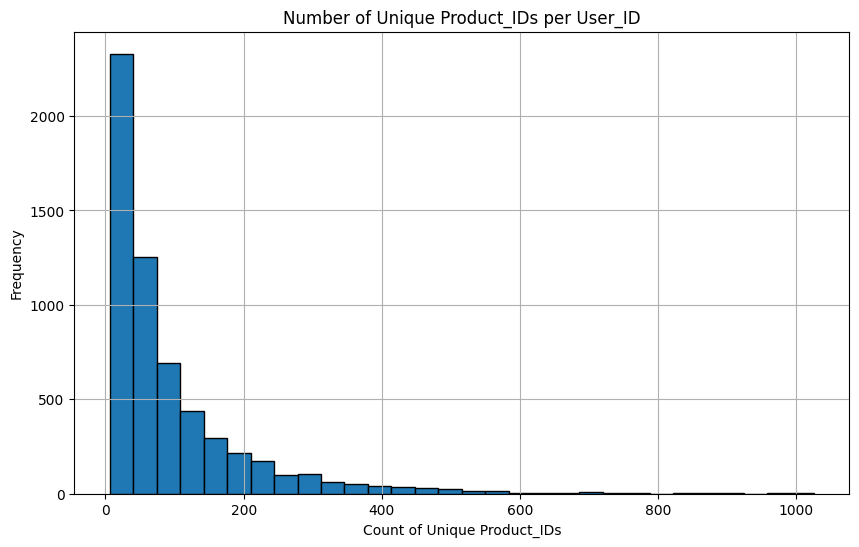

In [13]:

user_product_counts = data.groupby('User_ID')['Product_ID'].nunique().reset_index()
plt.figure(figsize=(10, 6))
plt.hist(user_product_counts['Product_ID'], bins=30, edgecolor='black')
plt.title('Number of Unique Product_IDs per User_ID')
plt.xlabel('Count of Unique Product_IDs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [14]:

purchase_product_count = data.groupby('Purchase')['Product_ID'].nunique()
purchases_with_multiple_products = purchase_product_count[purchase_product_count > 1]
print(purchases_with_multiple_products)


Purchase
12       2
13       2
14       2
24       2
25       2
        ..
23954    2
23955    3
23958    3
23959    2
23960    3
Name: Product_ID, Length: 16127, dtype: int64


In [15]:
duplicate_purchases = data[data.duplicated('Purchase')]
print(duplicate_purchases['Purchase'])


106       6973
202       7030
268       5897
358       7159
413       6996
          ... 
550063     368
550064     371
550065     137
550066     365
550067     490
Name: Purchase, Length: 531963, dtype: int64


In [16]:
duplicate_Product_ID = data[data.duplicated('Product_ID')]
print(duplicate_Product_ID['Product_ID'])

121       P00313042
126       P00248942
136       P00346642
149       P00118742
159       P00117442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: Product_ID, Length: 546437, dtype: object


In [17]:
duplicate_User_ID = data[data.duplicated('User_ID')]
print(duplicate_User_ID['User_ID'])

1         1000001
2         1000001
3         1000001
7         1000004
8         1000004
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: User_ID, Length: 544177, dtype: int64


Conatain duplicate enties in every feture
means that the order final price is similiar for for a specic prodcut id as per user id
that seems same product order by many customers in last month .

In [18]:

duplicate_entries = data[data.duplicated()]
print(duplicate_entries,len(duplicate_entries))


Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase]
Index: [] 0



for user_id in user_order_counts.index:
    
    user_data = data[data['User_ID'] == user_id]

    repeated_orders = user_data['Product_ID'].value_counts()

    print(f"User_ID: {user_id}")
    print(f"Number of times User_ID {user_id} appeared: {user_order_counts[user_id]}")
    print(f"Orders repeated for User_ID {user_id}:\n{repeated_orders}\n")


Their are not duplicate entries 
my null hypo theseis is wrong going with alternate that 
customers ,product are repeated but not with same list of products.

*******  *************

For every ID to ensure we have repeted customers

In [19]:

user_order_counts = data['User_ID'].value_counts()

repeated_orders_1000001 = data[data['User_ID'] == 1000001]['Product_ID'].value_counts()

print(f"Number of times User_ID 1000001 appeared: {user_order_counts.get(1000001, 0)}")
print(f"Orders repeated for User_ID 1000001:\n{repeated_orders_1000001}")


Number of times User_ID 1000001 appeared: 35
Orders repeated for User_ID 1000001:
Product_ID
P00069042    1
P00289942    1
P00178242    1
P00178342    1
P00183942    1
P00051442    1
P00248442    1
P00210342    1
P0097142     1
P00165942    1
P00255842    1
P00025442    1
P00074142    1
P00058142    1
P00220642    1
P00064042    1
P00111842    1
P00214842    1
P00248942    1
P00117942    1
P00087842    1
P00085442    1
P00085942    1
P00102642    1
P00110842    1
P00004842    1
P00258742    1
P00051842    1
P00142242    1
P00000142    1
P00297042    1
P00059442    1
P0096542     1
P00184942    1
P00375436    1
Name: count, dtype: int64


how t o get who are having repeative peoduct from gender age grp married status and their amount of purches

In [20]:

repetitive_purchases = data.groupby(['Gender', 'Age', 'Marital_Status', 'Product_ID']).size().reset_index(name='Purchase')

repetitive_customers = repetitive_purchases[repetitive_purchases['Purchase'] > 1]

repetitive_purchase_amounts = data.groupby(['Gender', 'Age', 'Marital_Status']).agg({'Purchase': 'mean'}).reset_index()

result = pd.merge(repetitive_customers, repetitive_purchase_amounts, on=['Gender', 'Age', 'Marital_Status'], how='inner')

print(result)


      Gender   Age  Marital_Status Product_ID  Purchase_x   Purchase_y
0          F  0-17               0  P00000142          20  8338.771985
1          F  0-17               0  P00000242           8  8338.771985
2          F  0-17               0  P00000342           3  8338.771985
3          F  0-17               0  P00000442           2  8338.771985
4          F  0-17               0  P00000542           5  8338.771985
...      ...   ...             ...        ...         ...          ...
44116      M   55+               1   P0098442           2  9252.416715
44117      M   55+               1   P0099042           2  9252.416715
44118      M   55+               1   P0099242           2  9252.416715
44119      M   55+               1   P0099342           3  9252.416715
44120      M   55+               1   P0099442           2  9252.416715

[44121 rows x 6 columns]


seems customers have repeative order

In [21]:
'''Features Information :
Variable Definition
● User_ID : User ID
● Product_ID : Product ID
● Gender : Sex of User
● Age : Age in bins
● Occupation : Occupation(Masked)
● City_Category : Category of the City (A,B,C)
● StayInCurrentCity Years : Number of years stay in current city
● Marital_Status : Marital Status
● ProductCategory1 : Product Category (Masked)
● ProductCategory2: Product may belongs to other category
also (Masked)
● ProductCategory3 : Product may belongs to other category
also (Masked)
● Purchase : Purchase Amount (Target Variable)'''

'Features Information :\nVariable Definition\n● User_ID : User ID\n● Product_ID : Product ID\n● Gender : Sex of User\n● Age : Age in bins\n● Occupation : Occupation(Masked)\n● City_Category : Category of the City (A,B,C)\n● StayInCurrentCity Years : Number of years stay in current city\n● Marital_Status : Marital Status\n● ProductCategory1 : Product Category (Masked)\n● ProductCategory2: Product may belongs to other category\nalso (Masked)\n● ProductCategory3 : Product may belongs to other category\nalso (Masked)\n● Purchase : Purchase Amount (Target Variable)'

#look's like we have  null value's a lot in Product_Category_2 and Product_Category_3 columns ,let's invistgate.

#their multiple possiblities we have blank vlaues in data.

#to overcome these we can talk with SME , I can get help of maths and Domain Knowledge . 

In [22]:
missing_values_count = data.isna().sum()
total_values = len(data)
missing_percentage = (missing_values_count / total_values) * 100

missing_data_info = pd.DataFrame({'Column_Name': missing_values_count.index, 'Missing_Count': missing_values_count.values, 'Missing_Percentage': missing_percentage.values})
missing_data_info = missing_data_info[missing_data_info['Missing_Count'] > 0]  
print(missing_data_info)

           Column_Name  Missing_Count  Missing_Percentage
9   Product_Category_2         173638           31.566643
10  Product_Category_3         383247           69.672659


In [23]:
print(f"\n",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB

 None


In [24]:
data

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
4                      NaN                 NaN      7969  
...                    ...                 ...       ...  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490  

[550068 rows x 12 columns]

To Find duplicate if customer  have repeative order of perticular prodcut

In [25]:

da = pd.DataFrame()  
for i in data.columns:
    deup_ent = data[i].value_counts()
    da[i + '_count'] = deup_ent
da    

User_ID_count  Product_ID_count  Gender_count  Age_count  \
User_ID                                                             
1001680           1026               NaN           NaN        NaN   
1004277            979               NaN           NaN        NaN   
1001941            898               NaN           NaN        NaN   
1001181            862               NaN           NaN        NaN   
1000889            823               NaN           NaN        NaN   
...                ...               ...           ...        ...   
1002690              7               NaN           NaN        NaN   
1002111              7               NaN           NaN        NaN   
1005810              7               NaN           NaN        NaN   
1004991              7               NaN           NaN        NaN   
1000708              6               NaN           NaN        NaN   

         Occupation_count  City_Category_count  \
User_ID                                          
1001680               NaN                  NaN   
1004277               NaN                  NaN   
1001941               NaN                  NaN   
1001181               NaN                  NaN   
1000889               NaN                  NaN   
...                   ...                  ...   
1002690               NaN                  NaN   
1002111               NaN                  NaN   
1005810               NaN                  NaN   
1004991               NaN                  NaN   
1000708               NaN                  NaN   

         Stay_In_Current_City_Years_count  Marital_Status_count  \
User_ID                                                           
1001680                               NaN                   NaN   
1004277                               NaN                   NaN   
1001941                               NaN                   NaN   
1001181                               NaN                   NaN   
1000889                               NaN                   NaN   
...                                   ...                   ...   
1002690                               NaN                   NaN   
1002111                               NaN                   NaN   
1005810                               NaN                   NaN   
1004991                               NaN                   NaN   
1000708                               NaN                   NaN   

         Product_Category_1_count  Product_Category_2_count  \
User_ID                                                       
1001680                       NaN                       NaN   
1004277                       NaN                       NaN   
1001941                       NaN                       NaN   
1001181                       NaN                       NaN   
1000889                       NaN                       NaN   
...                           ...                       ...   
1002690                       NaN                       NaN   
1002111                       NaN                       NaN   
1005810                       NaN                       NaN   
1004991                       NaN                       NaN   
1000708                       NaN                       NaN   

         Product_Category_3_count  Purchase_count  
User_ID                                            
1001680                       NaN             NaN  
1004277                       NaN             NaN  
1001941                       NaN             NaN  
1001181                       NaN             NaN  
1000889                       NaN             NaN  
...                           ...             ...  
1002690                       NaN             NaN  
1002111                       NaN             NaN  
1005810                       NaN             NaN  
1004991                       NaN             NaN  
1000708                       NaN             NaN  

[5891 rows x 12 columns]

In [26]:
duplicate_entries = da[da.duplicated()]
print(duplicate_entries,len(duplicate_entries))

         User_ID_count  Product_ID_count  Gender_count  Age_count  \
User_ID                                                             
1003841            698               NaN           NaN        NaN   
1004448            575               NaN           NaN        NaN   
1001605            558               NaN           NaN        NaN   
1000524            558               NaN           NaN        NaN   
1001912            549               NaN           NaN        NaN   
...                ...               ...           ...        ...   
1005608              7               NaN           NaN        NaN   
1002690              7               NaN           NaN        NaN   
1002111              7               NaN           NaN        NaN   
1005810              7               NaN           NaN        NaN   
1004991              7               NaN           NaN        NaN   

         Occupation_count  City_Category_count  \
User_ID                                          
10

In [27]:
cat_col = data[["Age","Marital_Status","Gender","City_Category","Stay_In_Current_City_Years"]]


sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

for i in cat_col.columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data[i])
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'Count plot for {i}')
    plt.show()


sns.countplot(x=data.Age,)
plt.show()
sns.countplot(x=data.Gender)
plt.show()
sns.countplot(x=data.City_Category)
plt.show()
sns.countplot(x=data.Stay_In_Current_City_Years)
plt.show()
sns.countplot(x=data.Marital_Status)
plt.show()


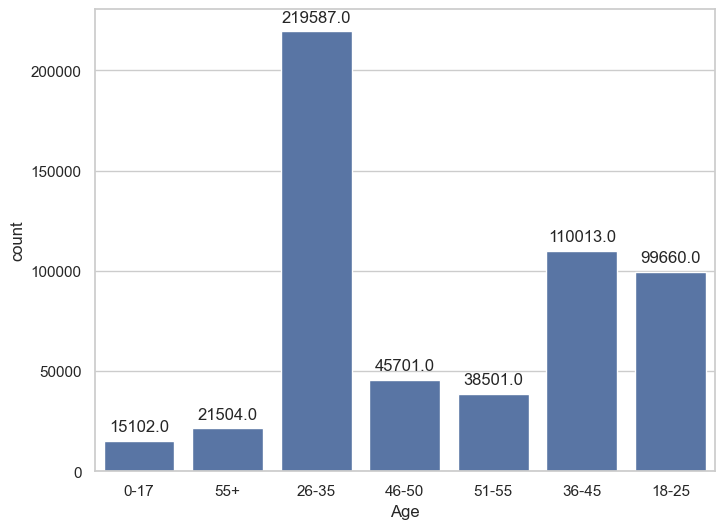

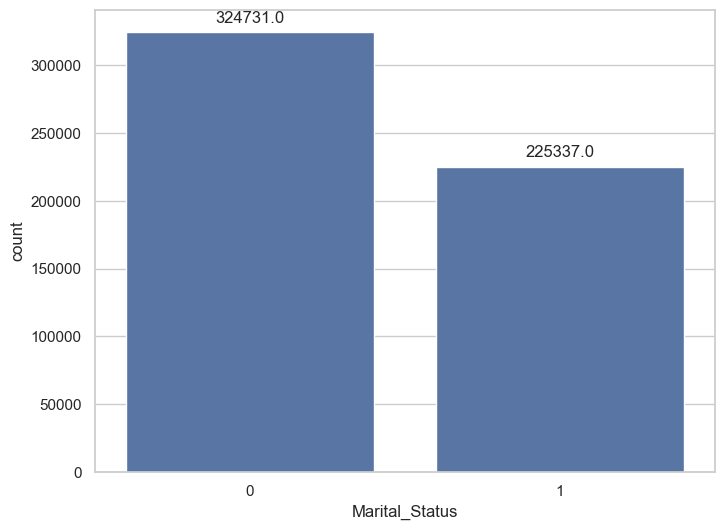

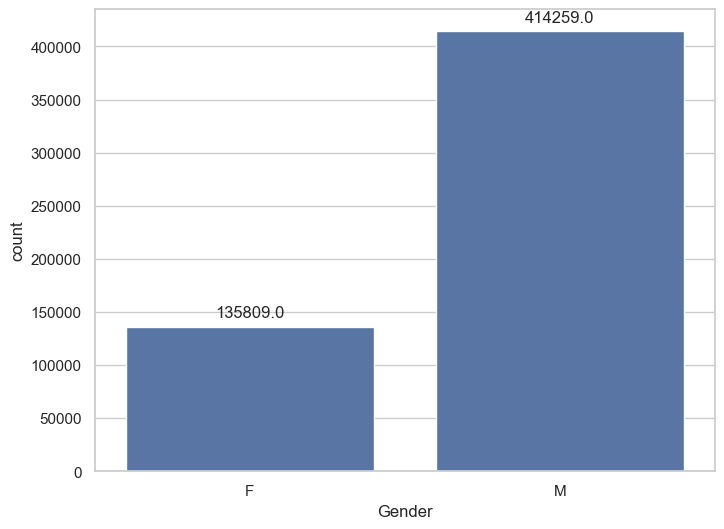

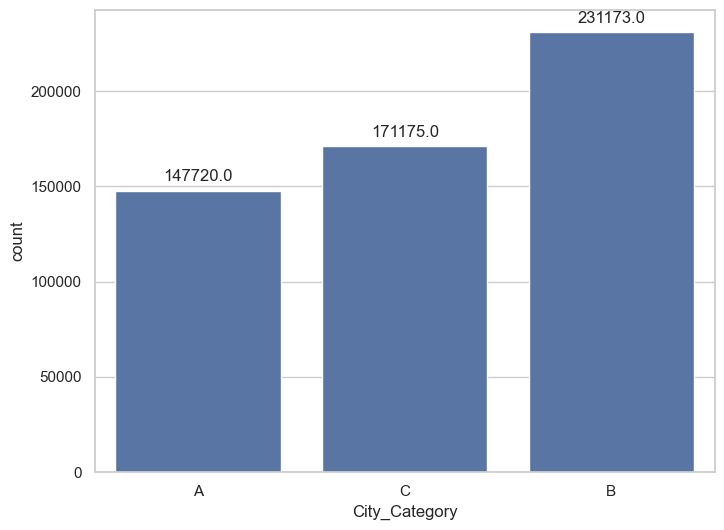

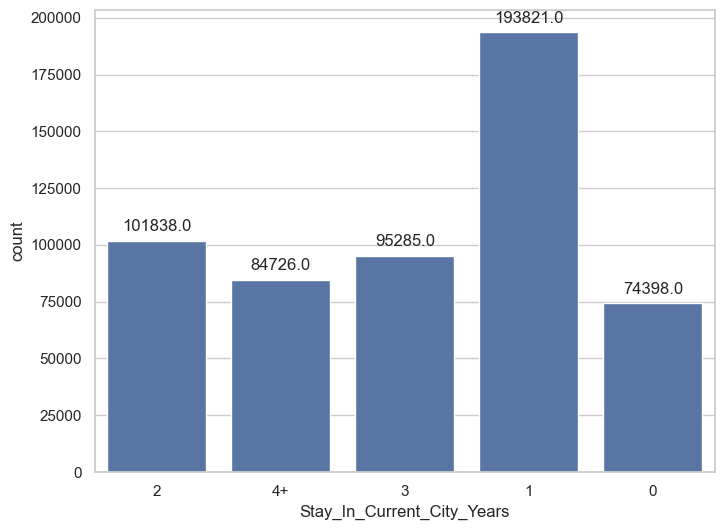

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
 
ax = sns.countplot(x='Age', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Marital_Status', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Gender', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='City_Category', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
 
ax = sns.countplot(x='Stay_In_Current_City_Years', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



##Observations

#consideing 0 might represent "Unmarried" or "Single."
1 might represent "Married." where count of unmarried ppl is more than 3.2lakh and 
count of ppl who are married is more than 2.5 lakh.
occurence of unmarried ppl buying prodcut in black friday sale is more.

#let's which age grp of ppl are buying
the age grp of ppl 26-3 buying more product compare to
other grp age ppl.

#catigary of city consideing tier 1 ,tier 2, and tier 3.
where the count of user bying of products are
from tier 1 - 1.4 lakh 
from tier 2 - 2.3 lakh
from tier 3 - 1.7 lakh

#Stay in current city having 1 yr customers with current city is more comapre to 
ppl who lived 0 ,2, 3 ,4.

#with mlae are dominating female for shoping strange!


In [29]:
pivot_age_marital_city_gender = data.pivot_table(index=[ 'Marital_Status', 'City_Category', 'Age','Gender'], values='Purchase', aggfunc='sum')
print(pivot_age_marital_city_gender)

                                            Purchase
Marital_Status City_Category Age   Gender           
0              A             0-17  F        11324587
                                   M        10592254
                             18-25 F        40552125
                                   M       154246557
                             26-35 F        85850177
...                                              ...
1              C             46-50 M        79691417
                             51-55 F        24333796
                                   M        76764338
                             55+   F        19155363
                                   M        56317881

[78 rows x 1 columns]


from above code observation we can see unmmaried 18-25 male are purchase more the target audience in every age

In [30]:
data['Stay_In_Current_City_Years']=(data['Stay_In_Current_City_Years'].str.strip('+').astype('int'))

In [31]:
data

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                                2               0                   3   
1                                2               0                   1   
2                                2               0                  12   
3                                2               0                  12   
4                                4               0                   8   
...                            ...             ...                 ...   
550063                           1               1                  20   
550064                           3               0                  20   
550065                           4               1                  20   
550066                           2               0                  20   
550067                           4               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
4                      NaN                 NaN      7969  
...                    ...                 ...       ...  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490  

[550068 rows x 12 columns]

In [32]:
d = data.copy()
d["A"] = data['Age'].str.strip('+')
d

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                                2               0                   3   
1                                2               0                   1   
2                                2               0                  12   
3                                2               0                  12   
4                                4               0                   8   
...                            ...             ...                 ...   
550063                           1               1                  20   
550064                           3               0                  20   
550065                           4               1                  20   
550066                           2               0                  20   
550067                           4               1                  20   

        Product_Category_2  Product_Category_3  Purchase      A  
0                      NaN                 NaN      8370   0-17  
1                      6.0                14.0     15200   0-17  
2                      NaN                 NaN      1422   0-17  
3                     14.0                 NaN      1057   0-17  
4                      NaN                 NaN      7969     55  
...                    ...                 ...       ...    ...  
550063                 NaN                 NaN       368  51-55  
550064                 NaN                 NaN       371  26-35  
550065                 NaN                 NaN       137  26-35  
550066                 NaN                 NaN       365     55  
550067                 NaN                 NaN       490  46-50  

[550068 rows x 13 columns]

In [33]:
data.Occupation.value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

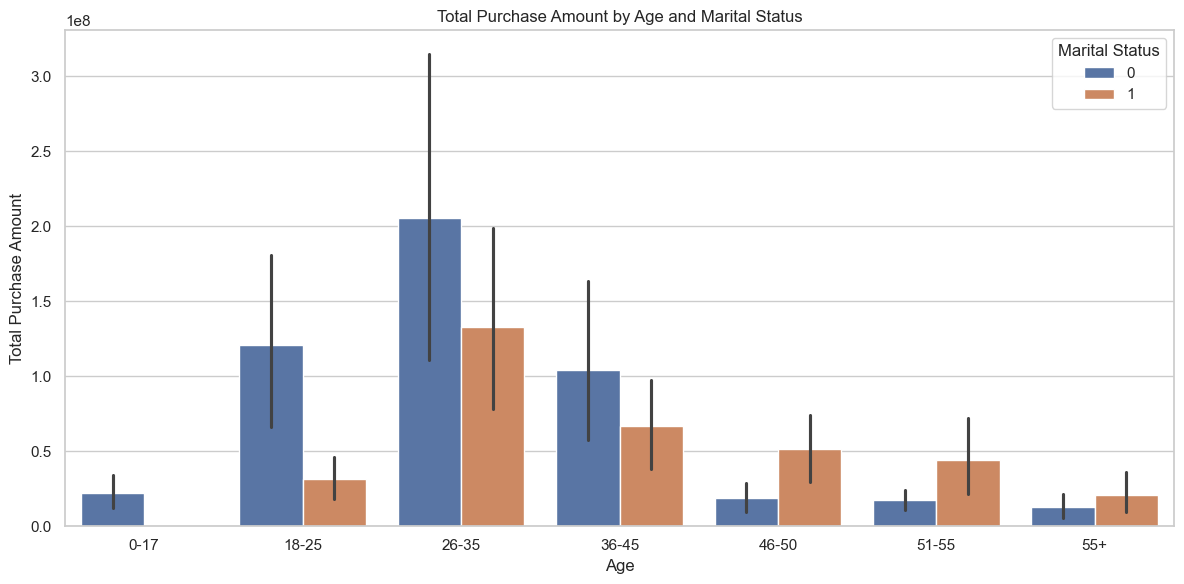

In [34]:
pivot_age_marital_city_gender.reset_index(inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Purchase', hue='Marital_Status', data=pivot_age_marital_city_gender)
plt.title('Total Purchase Amount by Age and Marital Status')
plt.xlabel('Age')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()


In [35]:
grouped_data = data.groupby([ 'Marital_Status', 'City_Category', 'Age','Gender'])['Purchase'].sum().reset_index()
print(grouped_data)


    Marital_Status City_Category    Age Gender   Purchase
0                0             A   0-17      F   11324587
1                0             A   0-17      M   10592254
2                0             A  18-25      F   40552125
3                0             A  18-25      M  154246557
4                0             A  26-35      F   85850177
..             ...           ...    ...    ...        ...
73               1             C  46-50      M   79691417
74               1             C  51-55      F   24333796
75               1             C  51-55      M   76764338
76               1             C    55+      F   19155363
77               1             C    55+      M   56317881

[78 rows x 5 columns]


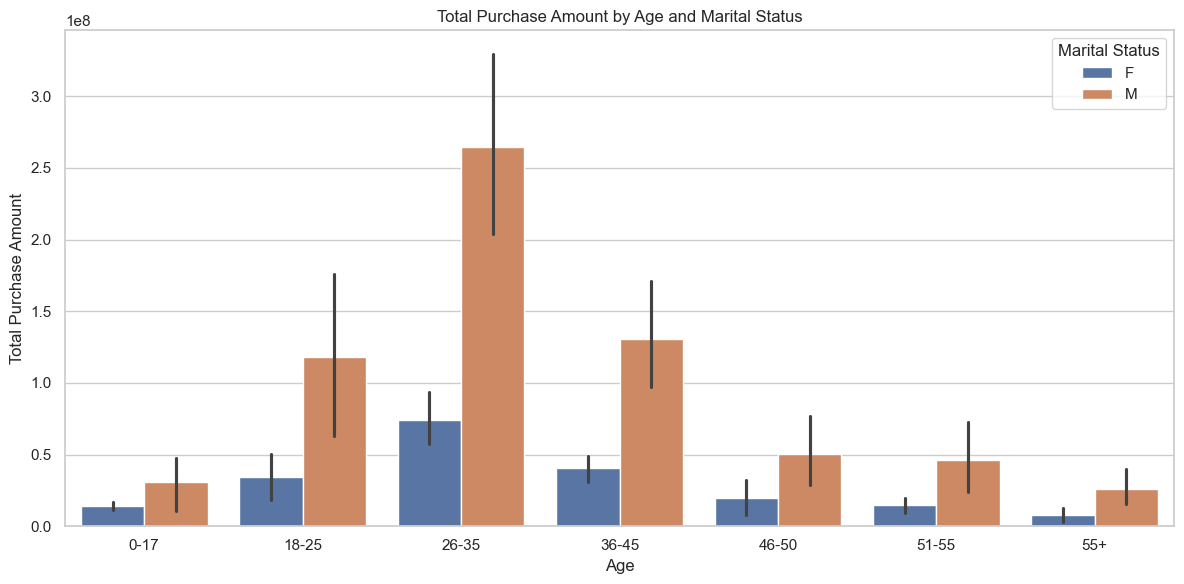

In [36]:
# Plotting grouped data
pivot_age_marital_city_gender.reset_index(inplace=True)

# Plotting using Seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Purchase', hue='Gender', data=grouped_data)
plt.title('Total Purchase Amount by Age and Marital Status')
plt.xlabel('Age')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

In [37]:
data.describe(exclude="object")

User_ID     Occupation  Stay_In_Current_City_Years  \
count  5.500680e+05  550068.000000               550068.000000   
mean   1.003029e+06       8.076707                    1.858418   
std    1.727592e+03       6.522660                    1.289443   
min    1.000001e+06       0.000000                    0.000000   
25%    1.001516e+06       2.000000                    1.000000   
50%    1.003077e+06       7.000000                    2.000000   
75%    1.004478e+06      14.000000                    3.000000   
max    1.006040e+06      20.000000                    4.000000   

       Marital_Status  Product_Category_1  Product_Category_2  \
count   550068.000000       550068.000000       376430.000000   
mean         0.409653            5.404270            9.842329   
std          0.491770            3.936211            5.086590   
min          0.000000            1.000000            2.000000   
25%          0.000000            1.000000            5.000000   
50%          0.000000            5.000000            9.000000   
75%          1.000000            8.000000           15.000000   
max          1.000000           20.000000           18.000000   

       Product_Category_3       Purchase  
count       166821.000000  550068.000000  
mean            12.668243    9263.968713  
std              4.125338    5023.065394  
min              3.000000      12.000000  
25%              9.000000    5823.000000  
50%             14.000000    8047.000000  
75%             16.000000   12054.000000  
max             18.000000   23961.000000

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


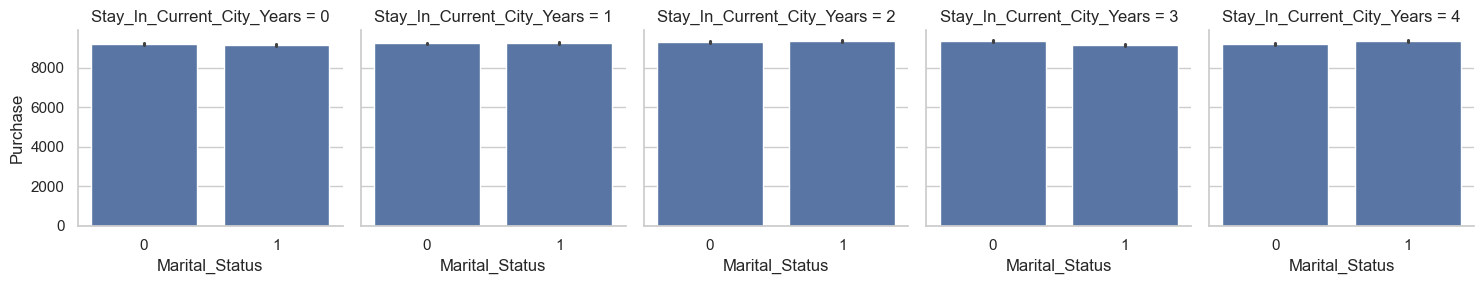

In [38]:
g = sns.FacetGrid(data,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase")

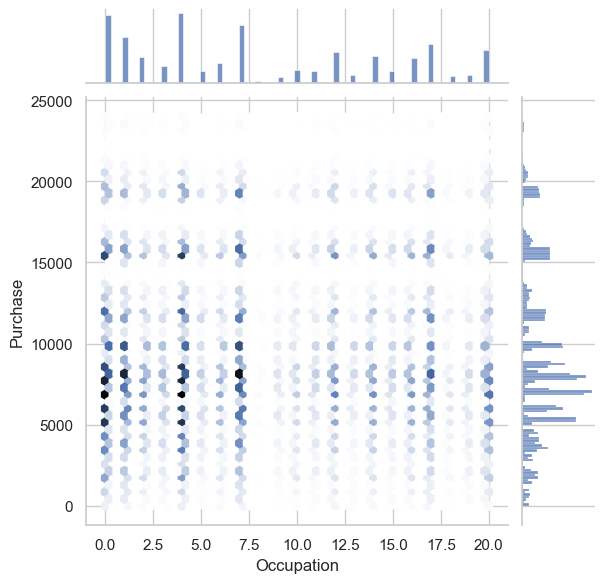

In [39]:
sns.jointplot(x='Occupation',y='Purchase',
              data=data, kind='hex'
             )

First insight would be that most of the purchase is done between 5000-10000.
Next important insight, would be the occupations that lead to highest purchases. In this case, it would be occupation 4, listed in the dataset, closely followed that by 0 and 7.
One can imagine that the store can run targeted advertiements next time around to people with above listed occupations as they more likely to spend within the above purchase range.

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


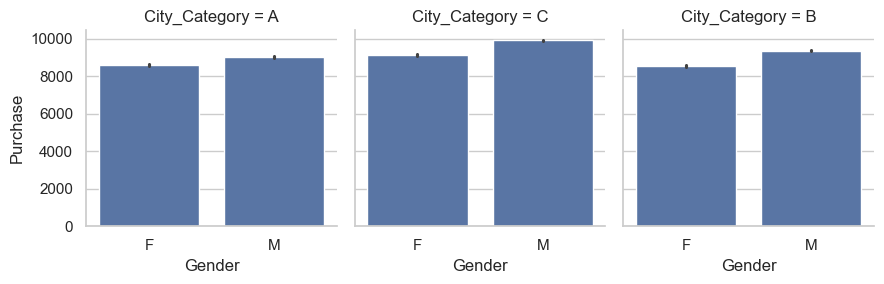

In [40]:
g = sns.FacetGrid(data,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase")

Clearly people from City_Category C are showing higher purchase capacity as compared to the other two cities on average.
For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_C, where Females tend to puchase more than men. It is a useful insight, and it be useful to oserve which age group of females does higher purchasing.

c:\Users\suyog\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


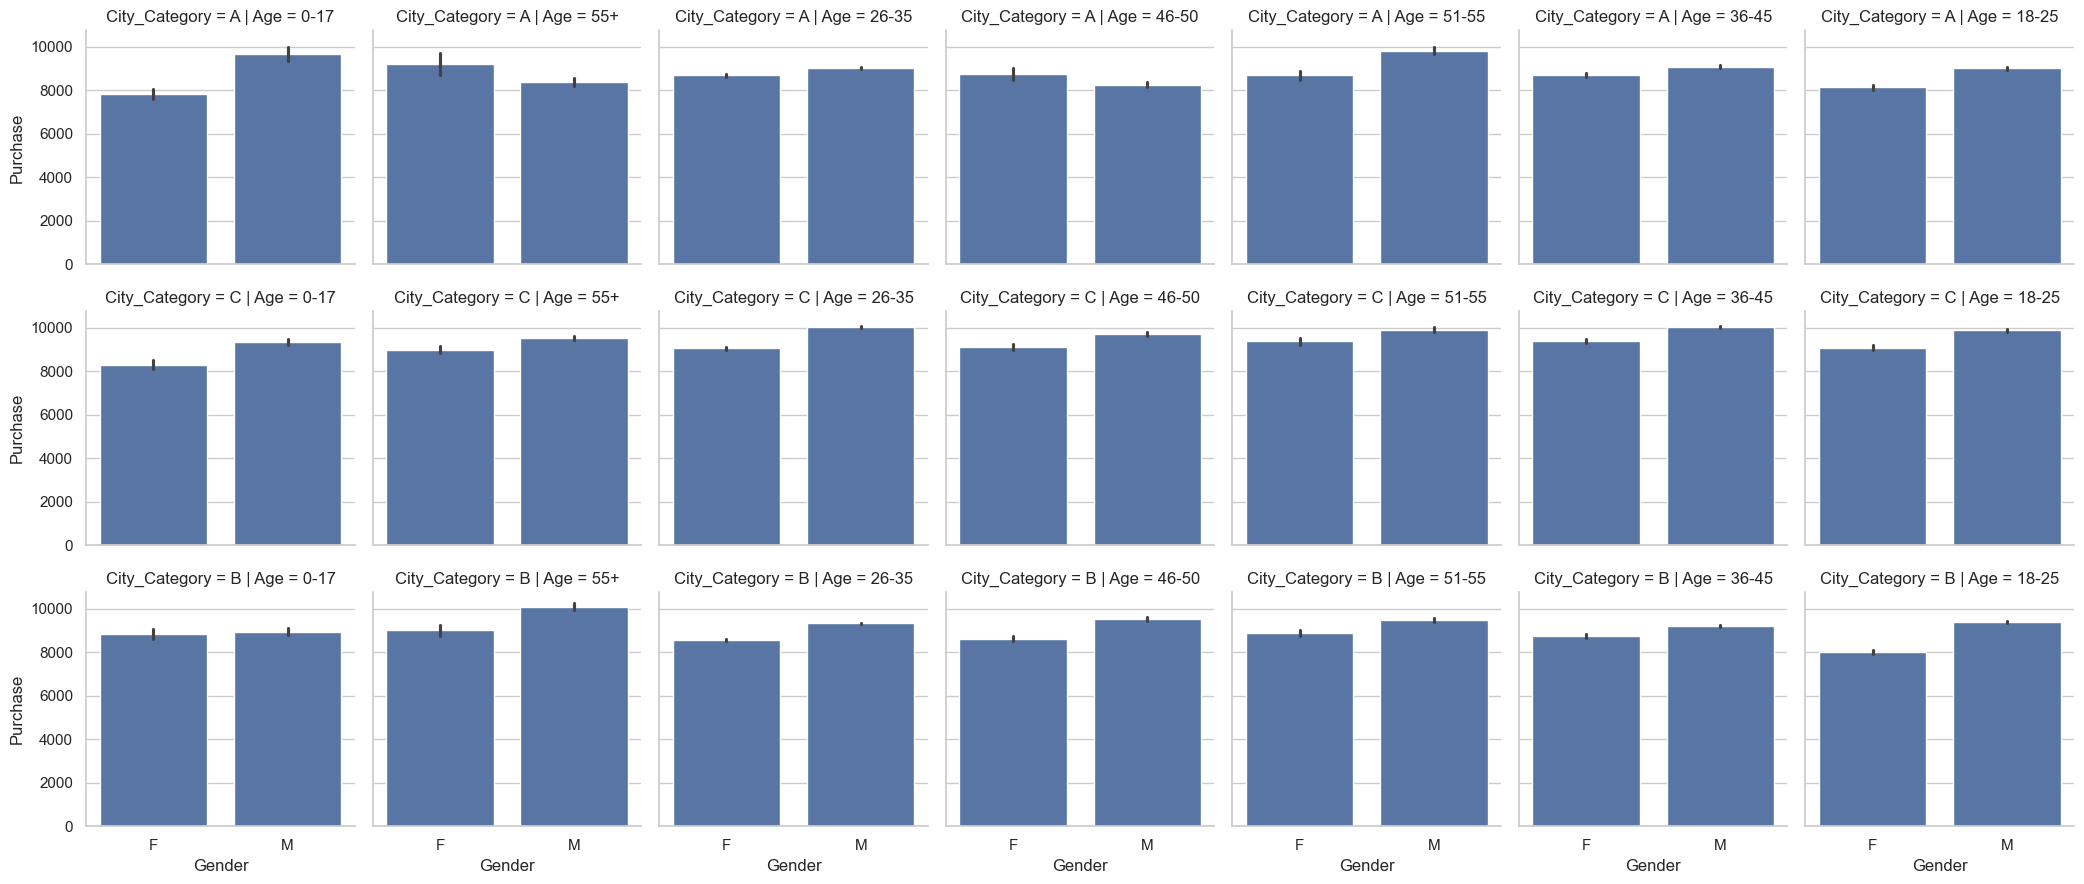

In [41]:
g = sns.FacetGrid(data,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase")

So, we focus on the first row of the visuaisation, i.e. City_Category_A and then on the bar for females.
There are two age groups that can be identified with higher purchase, 26-35 and 18-25. Therefore, apart from the male population of all the three city categories, females of City Category A in the above two identifies age groups can be identified as potential buyers for next time around.

<Axes: xlabel='City_Category', ylabel='Purchase'>

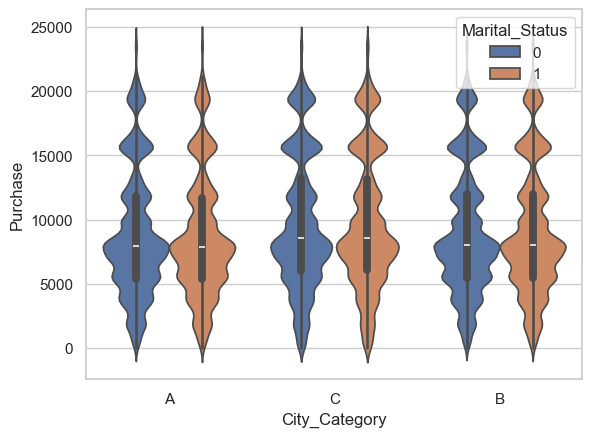

In [42]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',
               data=data)

Ananlysis of Purchase capacity as a function of Marital Status across city categories does not show a definitive trend. It would lead to a lot of assumptions and might lead to wrong conlcusions.

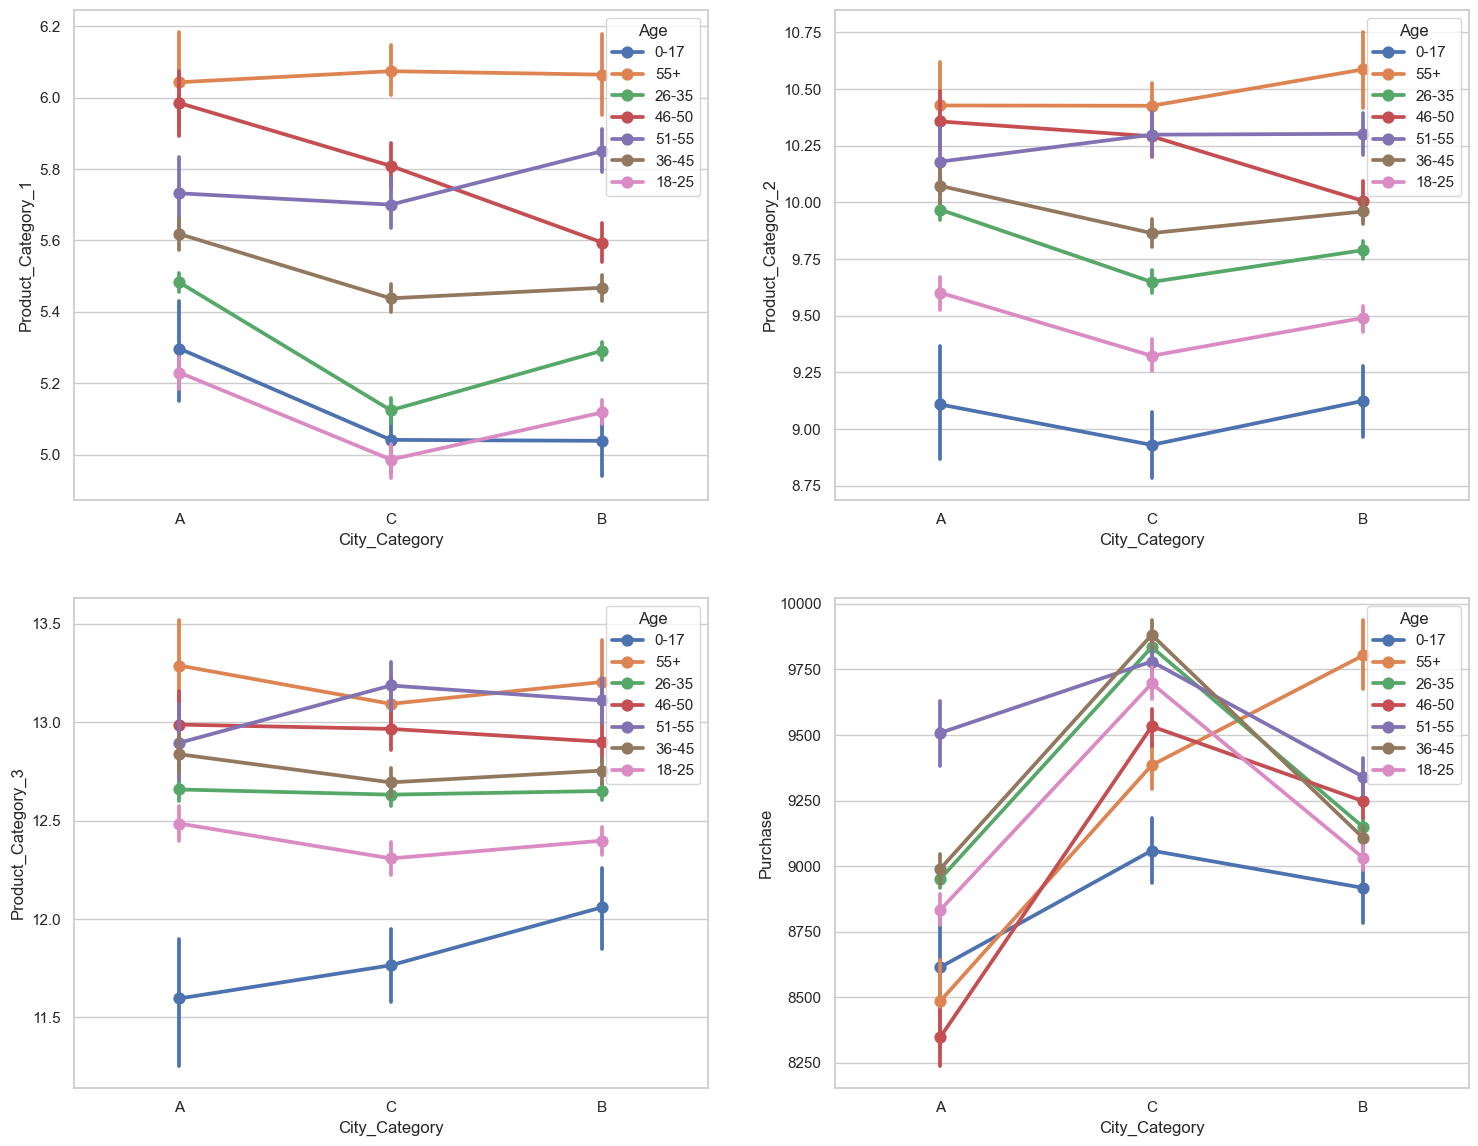

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=data,ax=axes[0,0])
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=data,ax=axes[0,1])
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=data,ax=axes[1,0])
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=data,ax=axes[1,1])


The stark difference in the purchase acoss City_Categories for the Age Group of 55 and above. It is highest in City_Category_B, as compared to the other age groups which tend to show high purchase in City_Category_C.

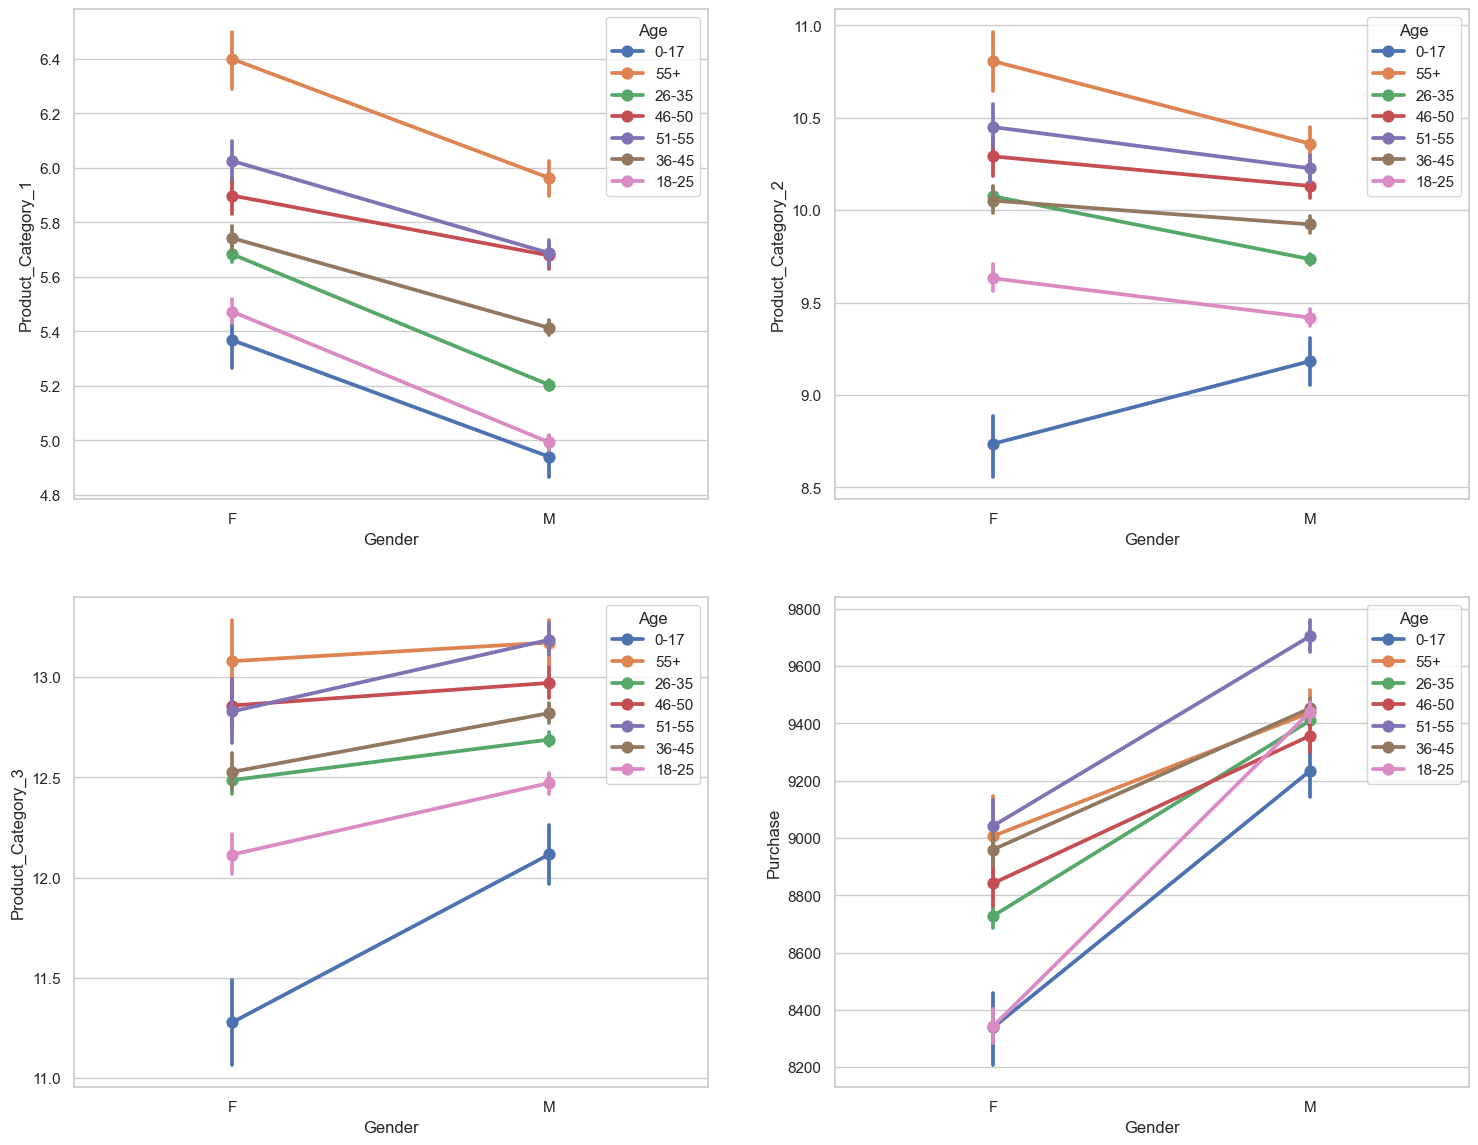

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='Gender',hue='Age',
                 data=data,ax=axes[0,0])
ax = sns.pointplot(y='Product_Category_2', x='Gender',hue='Age',
                 data=data,ax=axes[0,1])
ax = sns.pointplot(y='Product_Category_3', x='Gender', hue='Age',
                 data=data,ax=axes[1,0])
ax = sns.pointplot(y='Purchase', x='Gender', hue='Age',
                 data=data,ax=axes[1,1])

where as per gender if see male contribution's more product purcheses .

in every product catogegory both gender having equal interested .

##we can as per age chaining incresing the number assign for prodcut is also incresing ,

so we can say the no assign to lower category of prouct i s as per age .



In [45]:
data.Product_Category_3.unique(),data.Product_Category_2.unique() ,data.Product_Category_1.unique()

(array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
        18., 11., 10.]),
 array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
        10., 17., 13.,  7., 18.]),
 array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
         9, 20, 19], dtype=int64))

In [46]:
data.Product_Category_3.var(),data.Product_Category_2.var(),data.Product_Category_1.var()

(17.018410574491156, 25.873394254195656, 15.493759943030273)

In [47]:
data.Product_Category_3.std(),data.Product_Category_2.std(),data.Product_Category_1.std()

(4.125337631575282, 5.086589648693479, 3.936211369201389)

In [48]:
data.Product_Category_3.max(),data.Product_Category_2.max(),data.Product_Category_1.max(),data.Product_Category_3.min(),data.Product_Category_2.min(),data.Product_Category_1.min()

(18.0, 18.0, 20, 3.0, 2.0, 1)

In [49]:
data.Product_Category_3.skew(),data.Product_Category_2.skew(),data.Product_Category_1.skew()

(-0.7654458894373977, -0.1627577144156097, 1.0257349338538029)

In [50]:
data.Purchase.unique(),data.Purchase.var(),data.Purchase.std(),data.Purchase.min(),data.Purchase.max(),data.Purchase.skew()

(array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64),
 25231185.950597923,
 5023.065393820582,
 12,
 23961,
 0.6001400037087128)

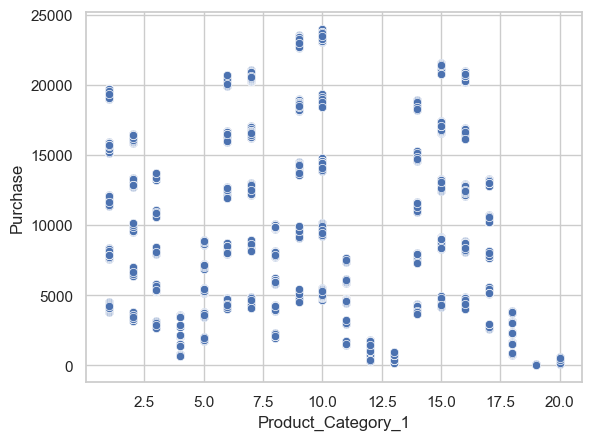

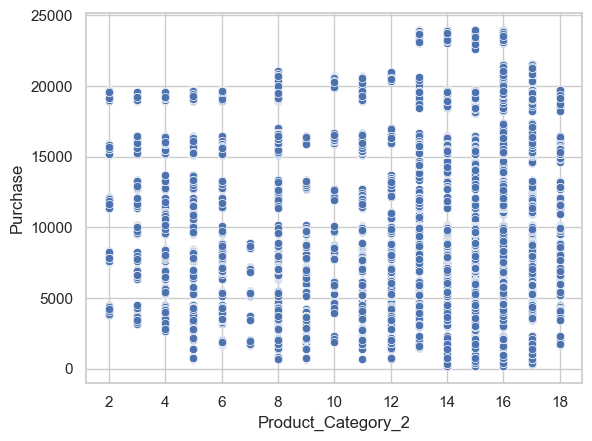

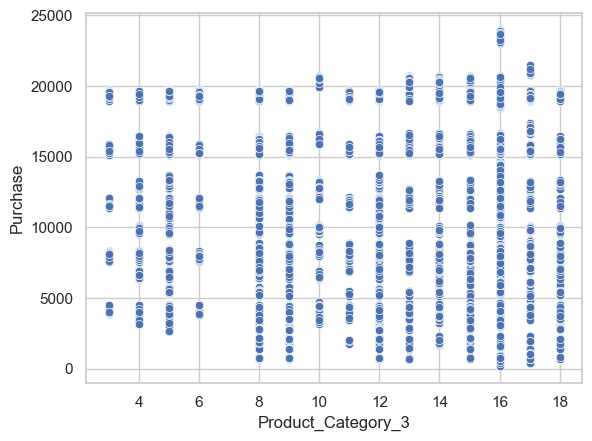

In [51]:
sns.scatterplot(y =data.Purchase , x= data.Product_Category_1)
plt.show()
sns.scatterplot(y =data.Purchase , x= data.Product_Category_2)
plt.show()
sns.scatterplot(y =data.Purchase , x= data.Product_Category_3)
plt.show()

In [52]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [53]:
data

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                                2               0                   3   
1                                2               0                   1   
2                                2               0                  12   
3                                2               0                  12   
4                                4               0                   8   
...                            ...             ...                 ...   
550063                           1               1                  20   
550064                           3               0                  20   
550065                           4               1                  20   
550066                           2               0                  20   
550067                           4               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
4                      NaN                 NaN      7969  
...                    ...                 ...       ...  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490  

[550068 rows x 12 columns]

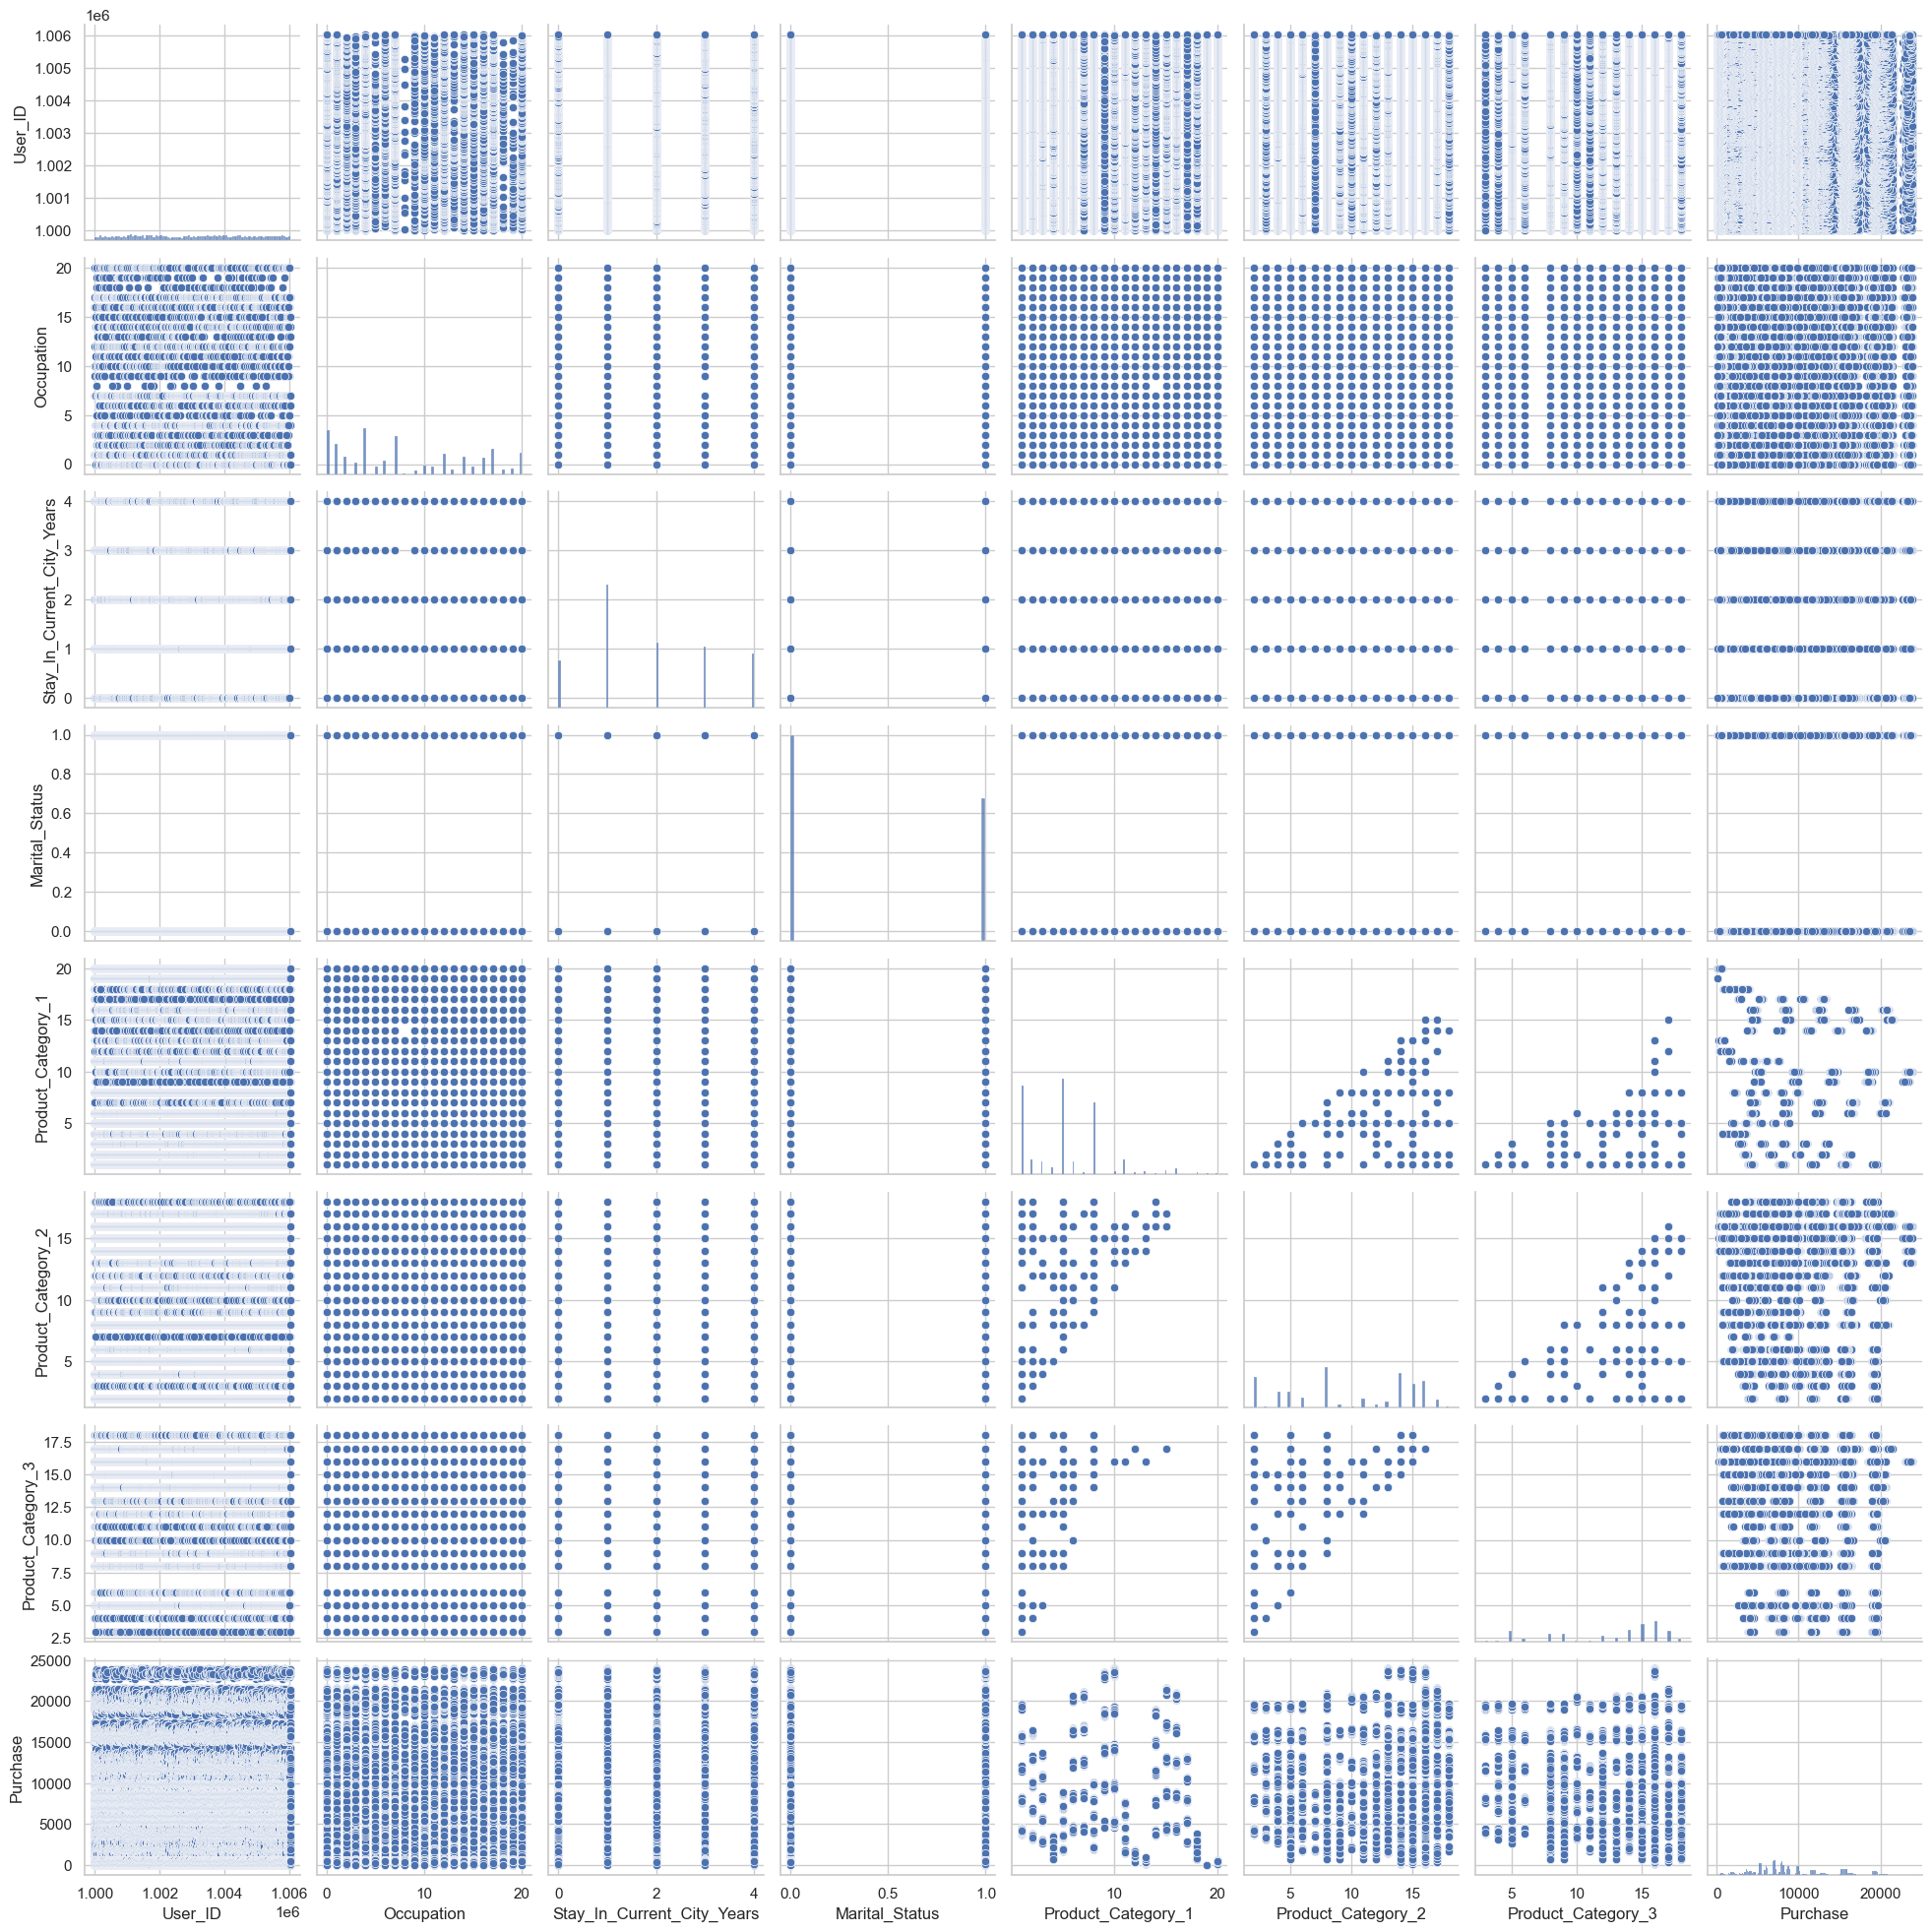

In [54]:
sns.pairplot(data)
plt.show()

In [55]:
grp1 = data.groupby(["Gender","Age"]).agg({"Purchase":"mean"})
grp1

Purchase
Gender Age               
F      0-17   8338.771985
       18-25  8343.180201
       26-35  8728.251754
       36-45  8959.844056
       46-50  8842.098947
       51-55  9042.449666
       55+    9007.036199
M      0-17   9235.173670
       18-25  9440.942971
       26-35  9410.337578
       36-45  9453.193643
       46-50  9357.471509
       51-55  9705.094802
       55+    9438.195603

@missing value Imputation

In [56]:
data.Product_Category_3.unique(),data.Product_Category_2.unique() 

(array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
        18., 11., 10.]),
 array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
        10., 17., 13.,  7., 18.]))

In [57]:
data.Product_Category_3.mean(),data.Product_Category_2.mean() 

(12.668243206790512, 9.842329251122386)

In [58]:
data.Product_Category_3.median(),data.Product_Category_2.median() 

(14.0, 9.0)

Discreate catogorical / multi catogrical the product Catogory columns

so we are feling with mode and median why ?

beacuse if we apply mean the data is skewed and the values we have in col we will not get that number even we get our data skewd due that will impact accurancy due mean deviation.

we will aplly mde and median both which ever good accurancy we will go with that.

In [59]:
data_mode = data.copy()
data_median = data.copy()

In [60]:
data_mode.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [61]:
data_mode.fillna(data_mode.mode().iloc[0],inplace=True)
data_mode.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [62]:
data_median.fillna(data_median[['Product_Category_2','Product_Category_3']].median(),inplace=True)
data_median.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


data_median[["Product_Category_2", "Product_Category_3"]] = data_median[["Product_Category_2", "Product_Category_3"]].fillna(data_median[["Product_Category_2", "Product_Category_3"]].median())
data_median.drop(["Product_Category_2", "Product_Category_3"], axis=1, inplace=True)
data_median = pd.concat([data_median, data[["Product_Category_2", "Product_Category_3"]]], axis=1)
data_median.isna().sum()


Product_ID: If your model aims to predict purchase behavior or purchase amounts based on different products, Product_ID might be crucial. It can help the model understand the impact of different products on purchase behavior.

User_ID: Similarly, if you want to personalize offers or understand how different customer segments behave, User_ID can be valuable. It allows the model to identify patterns or behaviors specific to certain customers.

We want create personlized for customer so we have to consider user id and product id 

beacause this are valuable customer to comapny and the PS we have says personalized offers for customers against different products

so these are our prior customers .

we will pattern from the customers so we can build recommendation and better searches.

In [63]:
data.Age

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, Length: 550068, dtype: object

In [64]:
data_mode

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                                2               0                   3   
1                                2               0                   1   
2                                2               0                  12   
3                                2               0                  12   
4                                4               0                   8   
...                            ...             ...                 ...   
550063                           1               1                  20   
550064                           3               0                  20   
550065                           4               1                  20   
550066                           2               0                  20   
550067                           4               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      8.0                16.0      8370  
1                      6.0                14.0     15200  
2                      8.0                16.0      1422  
3                     14.0                16.0      1057  
4                      8.0                16.0      7969  
...                    ...                 ...       ...  
550063                 8.0                16.0       368  
550064                 8.0                16.0       371  
550065                 8.0                16.0       137  
550066                 8.0                16.0       365  
550067                 8.0                16.0       490  

[550068 rows x 12 columns]

In [65]:
data_median

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                                2               0                   3   
1                                2               0                   1   
2                                2               0                  12   
3                                2               0                  12   
4                                4               0                   8   
...                            ...             ...                 ...   
550063                           1               1                  20   
550064                           3               0                  20   
550065                           4               1                  20   
550066                           2               0                  20   
550067                           4               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      9.0                14.0      8370  
1                      6.0                14.0     15200  
2                      9.0                14.0      1422  
3                     14.0                14.0      1057  
4                      9.0                14.0      7969  
...                    ...                 ...       ...  
550063                 9.0                14.0       368  
550064                 9.0                14.0       371  
550065                 9.0                14.0       137  
550066                 9.0                14.0       365  
550067                 9.0                14.0       490  

[550068 rows x 12 columns]

Encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_mode['Age'] = label_encoder.fit_transform(data_mode['Age'])
data_median['Age'] = label_encoder.fit_transform(data_median['Age'])

In [66]:
data_median

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                                2               0                   3   
1                                2               0                   1   
2                                2               0                  12   
3                                2               0                  12   
4                                4               0                   8   
...                            ...             ...                 ...   
550063                           1               1                  20   
550064                           3               0                  20   
550065                           4               1                  20   
550066                           2               0                  20   
550067                           4               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      9.0                14.0      8370  
1                      6.0                14.0     15200  
2                      9.0                14.0      1422  
3                     14.0                14.0      1057  
4                      9.0                14.0      7969  
...                    ...                 ...       ...  
550063                 9.0                14.0       368  
550064                 9.0                14.0       371  
550065                 9.0                14.0       137  
550066                 9.0                14.0       365  
550067                 9.0                14.0       490  

[550068 rows x 12 columns]

In [67]:
one_hot_encoded = pd.get_dummies(data_mode['Age'], prefix='Age')
data_mode = pd.concat([data_mode, one_hot_encoded], axis=1)
one_hot_encoded = pd.get_dummies(data_median['Age'], prefix='Age')
data_median = pd.concat([data_median, one_hot_encoded], axis=1)

one_hot_encoded = pd.get_dummies(data_mode['Gender'], prefix='Gender')
data_mode = pd.concat([data_mode, one_hot_encoded], axis=1)
one_hot_encoded = pd.get_dummies(data_median['Gender'], prefix='Gender')
data_median = pd.concat([data_median, one_hot_encoded], axis=1)


one_hot_encoded = pd.get_dummies(data_mode['City_Category'], prefix='City_Category')
data_mode = pd.concat([data_mode, one_hot_encoded], axis=1)
one_hot_encoded = pd.get_dummies(data_median['City_Category'], prefix='City_Category')
data_median = pd.concat([data_median, one_hot_encoded], axis=1)

one_hot_encoded = pd.get_dummies(data_mode['Stay_In_Current_City_Years'], prefix='Stay_In_Current_City_Years')
data_mode = pd.concat([data_mode, one_hot_encoded], axis=1)
one_hot_encoded = pd.get_dummies(data_median['Stay_In_Current_City_Years'], prefix='Stay_In_Current_City_Years')
data_median = pd.concat([data_median, one_hot_encoded], axis=1)
data_mode,data_median

(        User_ID Product_ID Gender    Age  Occupation City_Category  \
 0       1000001  P00069042      F   0-17          10             A   
 1       1000001  P00248942      F   0-17          10             A   
 2       1000001  P00087842      F   0-17          10             A   
 3       1000001  P00085442      F   0-17          10             A   
 4       1000002  P00285442      M    55+          16             C   
 ...         ...        ...    ...    ...         ...           ...   
 550063  1006033  P00372445      M  51-55          13             B   
 550064  1006035  P00375436      F  26-35           1             C   
 550065  1006036  P00375436      F  26-35          15             B   
 550066  1006038  P00375436      F    55+           1             C   
 550067  1006039  P00371644      F  46-50           0             B   
 
         Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
 0                                2               0                   3

In [68]:
data_median

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                                2               0                   3   
1                                2               0                   1   
2                                2               0                  12   
3                                2               0                  12   
4                                4               0                   8   
...                            ...             ...                 ...   
550063                           1               1                  20   
550064                           3               0                  20   
550065                           4               1                  20   
550066                           2               0                  20   
550067                           4               1                  20   

        Product_Category_2  ...  Gender_F  Gender_M  City_Category_A  \
0                      9.0  ...      True     False             True   
1                      6.0  ...      True     False             True   
2                      9.0  ...      True     False             True   
3                     14.0  ...      True     False             True   
4                      9.0  ...     False      True            False   
...                    ...  ...       ...       ...              ...   
550063                 9.0  ...     False      True            False   
550064                 9.0  ...      True     False            False   
550065                 9.0  ...      True     False            False   
550066                 9.0  ...      True     False            False   
550067                 9.0  ...      True     False            False   

        City_Category_B  City_Category_C  Stay_In_Current_City_Years_0  \
0                 False            False                         False   
1                 False            False                         False   
2                 False            False                         False   
3                 False            False                         False   
4                 False             True                         False   
...                 ...              ...                           ...   
550063             True            False                         False   
550064            False             True                         False   
550065             True            False                         False   
550066            False             True                         False   
550067             True            False                         False   

        Stay_In_Current_City_Years_1  Stay_In_Current_City_Years_2  \
0                              False                          True   
1                              False                          True   
2                              False                          True   
3                              False                          True   
4                              False                         False   
...                              ...                           ...   
550063                          Tr

In [69]:
data_mode.drop(["Age","Gender","City_Category","Stay_In_Current_City_Years"],axis=1,inplace=True)
data_median.drop(["Age","Gender","City_Category","Stay_In_Current_City_Years"],axis=1,inplace=True)

In [70]:
data_median.columns

Index(['User_ID', 'Product_ID', 'Occupation', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'Gender_F', 'Gender_M',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4'],
      dtype='object')

In [71]:

int_columns = [ 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'Gender_F',
       'Gender_M', 'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4']

data_mode[int_columns] = data_mode[int_columns].astype(int)
data_median[int_columns] = data_median[int_columns].astype(int)

In [72]:
data_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   User_ID                       550068 non-null  int64  
 1   Product_ID                    550068 non-null  object 
 2   Occupation                    550068 non-null  int64  
 3   Marital_Status                550068 non-null  int64  
 4   Product_Category_1            550068 non-null  int64  
 5   Product_Category_2            550068 non-null  float64
 6   Product_Category_3            550068 non-null  float64
 7   Purchase                      550068 non-null  int64  
 8   Age_0-17                      550068 non-null  int32  
 9   Age_18-25                     550068 non-null  int32  
 10  Age_26-35                     550068 non-null  int32  
 11  Age_36-45                     550068 non-null  int32  
 12  Age_46-50                     550068 non-nul

In [73]:
data_mode['Product_Num'] = data_mode['Product_ID'].str.extract('(\d+)').astype(int)
data_median['Product_Num'] = data_median['Product_ID'].str.extract('(\d+)').astype(int)

In [74]:
data_mode

User_ID Product_ID  Occupation  Marital_Status  Product_Category_1  \
0       1000001  P00069042          10               0                   3   
1       1000001  P00248942          10               0                   1   
2       1000001  P00087842          10               0                  12   
3       1000001  P00085442          10               0                  12   
4       1000002  P00285442          16               0                   8   
...         ...        ...         ...             ...                 ...   
550063  1006033  P00372445          13               1                  20   
550064  1006035  P00375436           1               0                  20   
550065  1006036  P00375436          15               1                  20   
550066  1006038  P00375436           1               0                  20   
550067  1006039  P00371644           0               1                  20   

        Product_Category_2  Product_Category_3  Purchase  Age_0-17  Age_18-25  \
0                      8.0                16.0      8370         1          0   
1                      6.0                14.0     15200         1          0   
2                      8.0                16.0      1422         1          0   
3                     14.0                16.0      1057         1          0   
4                      8.0                16.0      7969         0          0   
...                    ...                 ...       ...       ...        ...   
550063                 8.0                16.0       368         0          0   
550064                 8.0                16.0       371         0          0   
550065                 8.0                16.0       137         0          0   
550066                 8.0                16.0       365         0          0   
550067                 8.0                16.0       490         0          0   

        ...  Gender_M  City_Category_A  City_Category_B  City_Category_C  \
0       ...         0                1                0                0   
1       ...         0                1                0                0   
2       ...         0                1                0                0   
3       ...         0                1                0                0   
4       ...         1                0                0                1   
...     ...       ...              ...              ...              ...   
550063  ...         1                0                1                0   
550064  ...         0                0                0                1   
550065  ...         0                0                1                0   
550066  ...         0                0                0                1   
550067  ...         0                0                1                0   

        Stay_In_Current_City_Years_0  Stay_In_Current_City_Years_1  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   
...                              ...                           ...   
550063                             0                             1   
550064                             0                             0   
550065                             0                             0   
550066                             0                             0   
550067                             0                             0   

        Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
0                                  1                             0   
1                                  1                             0   
2                                  1                             0   
3                                  1                            

In [75]:
data_median

User_ID Product_ID  Occupation  Marital_Status  Product_Category_1  \
0       1000001  P00069042          10               0                   3   
1       1000001  P00248942          10               0                   1   
2       1000001  P00087842          10               0                  12   
3       1000001  P00085442          10               0                  12   
4       1000002  P00285442          16               0                   8   
...         ...        ...         ...             ...                 ...   
550063  1006033  P00372445          13               1                  20   
550064  1006035  P00375436           1               0                  20   
550065  1006036  P00375436          15               1                  20   
550066  1006038  P00375436           1               0                  20   
550067  1006039  P00371644           0               1                  20   

        Product_Category_2  Product_Category_3  Purchase  Age_0-17  Age_18-25  \
0                      9.0                14.0      8370         1          0   
1                      6.0                14.0     15200         1          0   
2                      9.0                14.0      1422         1          0   
3                     14.0                14.0      1057         1          0   
4                      9.0                14.0      7969         0          0   
...                    ...                 ...       ...       ...        ...   
550063                 9.0                14.0       368         0          0   
550064                 9.0                14.0       371         0          0   
550065                 9.0                14.0       137         0          0   
550066                 9.0                14.0       365         0          0   
550067                 9.0                14.0       490         0          0   

        ...  Gender_M  City_Category_A  City_Category_B  City_Category_C  \
0       ...         0                1                0                0   
1       ...         0                1                0                0   
2       ...         0                1                0                0   
3       ...         0                1                0                0   
4       ...         1                0                0                1   
...     ...       ...              ...              ...              ...   
550063  ...         1                0                1                0   
550064  ...         0                0                0                1   
550065  ...         0                0                1                0   
550066  ...         0                0                0                1   
550067  ...         0                0                1                0   

        Stay_In_Current_City_Years_0  Stay_In_Current_City_Years_1  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   
...                              ...                           ...   
550063                             0                             1   
550064                             0                             0   
550065                             0                             0   
550066                             0                             0   
550067                             0                             0   

        Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
0                                  1                             0   
1                                  1                             0   
2                                  1                             0   
3                                  1                            

In [76]:
data_mode.drop("Product_ID",axis=1,inplace=True)
data_median.drop("Product_ID",axis=1,inplace=True)

Hetamap

sns.heatmap(data_mode, cmap='YlGnBu')

for i in range(data_mode.shape[0]):
    for j in range(data_mode.shape[1]):
        plt.gca().add_patch(plt.Circle((j + 0.5, i + 0.5), 0.3, color='red', fill=False))

plt.show()

sns.heatmap(data_median, cmap='YlGnBu')

for i in range(data_median.shape[0]):
    for j in range(data_median.shape[1]):
        plt.gca().add_patch(plt.Circle((j + 0.5, i + 0.5), 0.3, color='red', fill=False))

plt.show()

                               User_ID  Occupation  Marital_Status  \
User_ID                            NaN   -0.023971        0.020443   
Occupation                   -0.023971         NaN        0.024280   
Marital_Status                0.020443    0.024280             NaN   
Product_Category_1            0.003825   -0.007618        0.019888   
Product_Category_2            0.002065    0.001566        0.010260   
Product_Category_3           -0.000186    0.000246        0.013978   
Purchase                      0.004716    0.020833       -0.000463   
Age_0-17                     -0.029809    0.017627       -0.139961   
Age_18-25                    -0.061903   -0.096659       -0.189174   
Age_26-35                     0.039550   -0.022461       -0.027654   
Age_36-45                     0.010785    0.058309       -0.013227   
Age_46-50                     0.028149    0.020323        0.191389   
Age_51-55                    -0.006963    0.030846        0.172278   
Age_55+             

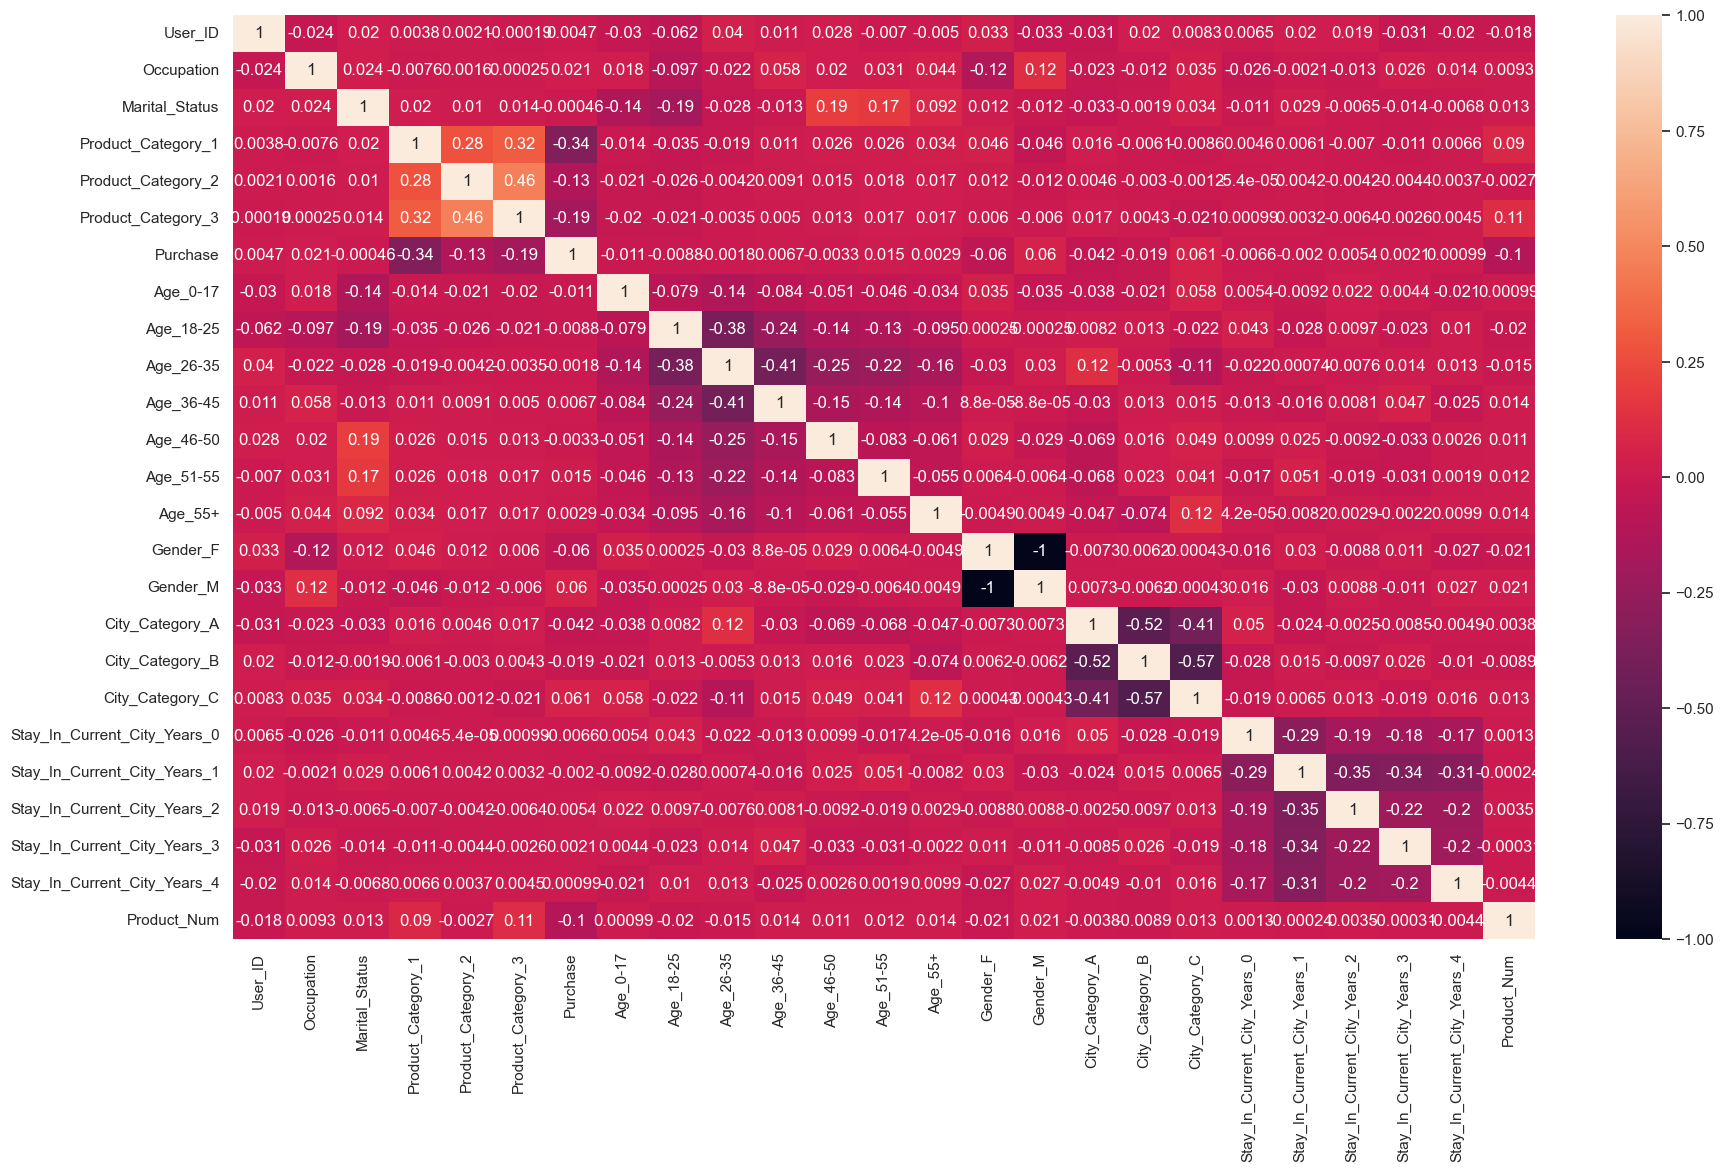

In [77]:
plt.figure(figsize=(21, 12))
c1 = data_mode.corr()
c2 = data_median.corr()
sns.heatmap(data =c1 ,annot =True,color = "k")
threshold = 0.4
high_correlation = c1[((c1 < -threshold) | (c1 < threshold)) & (c1 != 1.0)]
result1 = high_correlation.dropna(axis=1, how='all')
print(result1)

In [78]:
result1

User_ID  Occupation  Marital_Status  \
User_ID                            NaN   -0.023971        0.020443   
Occupation                   -0.023971         NaN        0.024280   
Marital_Status                0.020443    0.024280             NaN   
Product_Category_1            0.003825   -0.007618        0.019888   
Product_Category_2            0.002065    0.001566        0.010260   
Product_Category_3           -0.000186    0.000246        0.013978   
Purchase                      0.004716    0.020833       -0.000463   
Age_0-17                     -0.029809    0.017627       -0.139961   
Age_18-25                    -0.061903   -0.096659       -0.189174   
Age_26-35                     0.039550   -0.022461       -0.027654   
Age_36-45                     0.010785    0.058309       -0.013227   
Age_46-50                     0.028149    0.020323        0.191389   
Age_51-55                    -0.006963    0.030846        0.172278   
Age_55+                      -0.004961    0.044096        0.091778   
Gender_F                      0.033474   -0.117291        0.011603   
Gender_M                     -0.033474    0.117291       -0.011603   
City_Category_A              -0.030568   -0.023070       -0.033088   
City_Category_B               0.019688   -0.011673       -0.001863   
City_Category_C               0.008272    0.034529        0.033661   
Stay_In_Current_City_Years_0  0.006495   -0.026055       -0.010673   
Stay_In_Current_City_Years_1  0.019574   -0.002092        0.028831   
Stay_In_Current_City_Years_2  0.018551   -0.012716       -0.006474   
Stay_In_Current_City_Years_3 -0.030953    0.025974       -0.013635   
Stay_In_Current_City_Years_4 -0.019567    0.013905       -0.006782   
Product_Num                  -0.017619    0.009344        0.013194   

                              Product_Category_1  Product_Category_2  \
User_ID                                 0.003825            0.002065   
Occupation                             -0.007618            0.001566   
Marital_Status                          0.019888            0.010260   
Product_Category_1                           NaN            0.279247   
Product_Category_2                      0.279247                 NaN   
Product_Category_3                      0.317944                 NaN   
Purchase                               -0.343703           -0.128651   
Age_0-17                               -0.013681           -0.020906   
Age_18-25                              -0.035036           -0.026345   
Age_26-35                              -0.018637           -0.004193   
Age_36-45                               0.011429            0.009081   
Age_46-50                               0.025842            0.015145   
Age_51-55                               0.025784            0.017983   
Age_55+                                 0.033925            0.016593   
Gender_F                                0.045594            0.012445   
Gender_M                               -0.045594           -0.012445   
City_Category_A                         0.015702            0.004642   
City_Category_B                        -0.006076           -0.003020   
City_Category_C                        -0.008554           -0.001224   
Stay_In_Current_City_Years_0            0.004576           -0.000054   
Stay_In_Current_City_Years_1            0.006121            0.004170   
Stay_In_Current_City_Years_2           -0.007000           -0.004201   
Stay_In_Current_City_Years_3           -0.010995           -0.004424   
Stay_In_Current_City_Years_4            0.006624            0.003691   
Product_Num                             0.090193           -0.002729   

                              Product_Category_3  Purchase  Age_0-17  \
User_ID                                -0.000186  0.004716 -0.029809   
Occupation                              0.000246  0.020833  0.017627   
Marital_Status                          0.013978 -0.000463 -0.139961   
Product_Category_1                      0.317944 

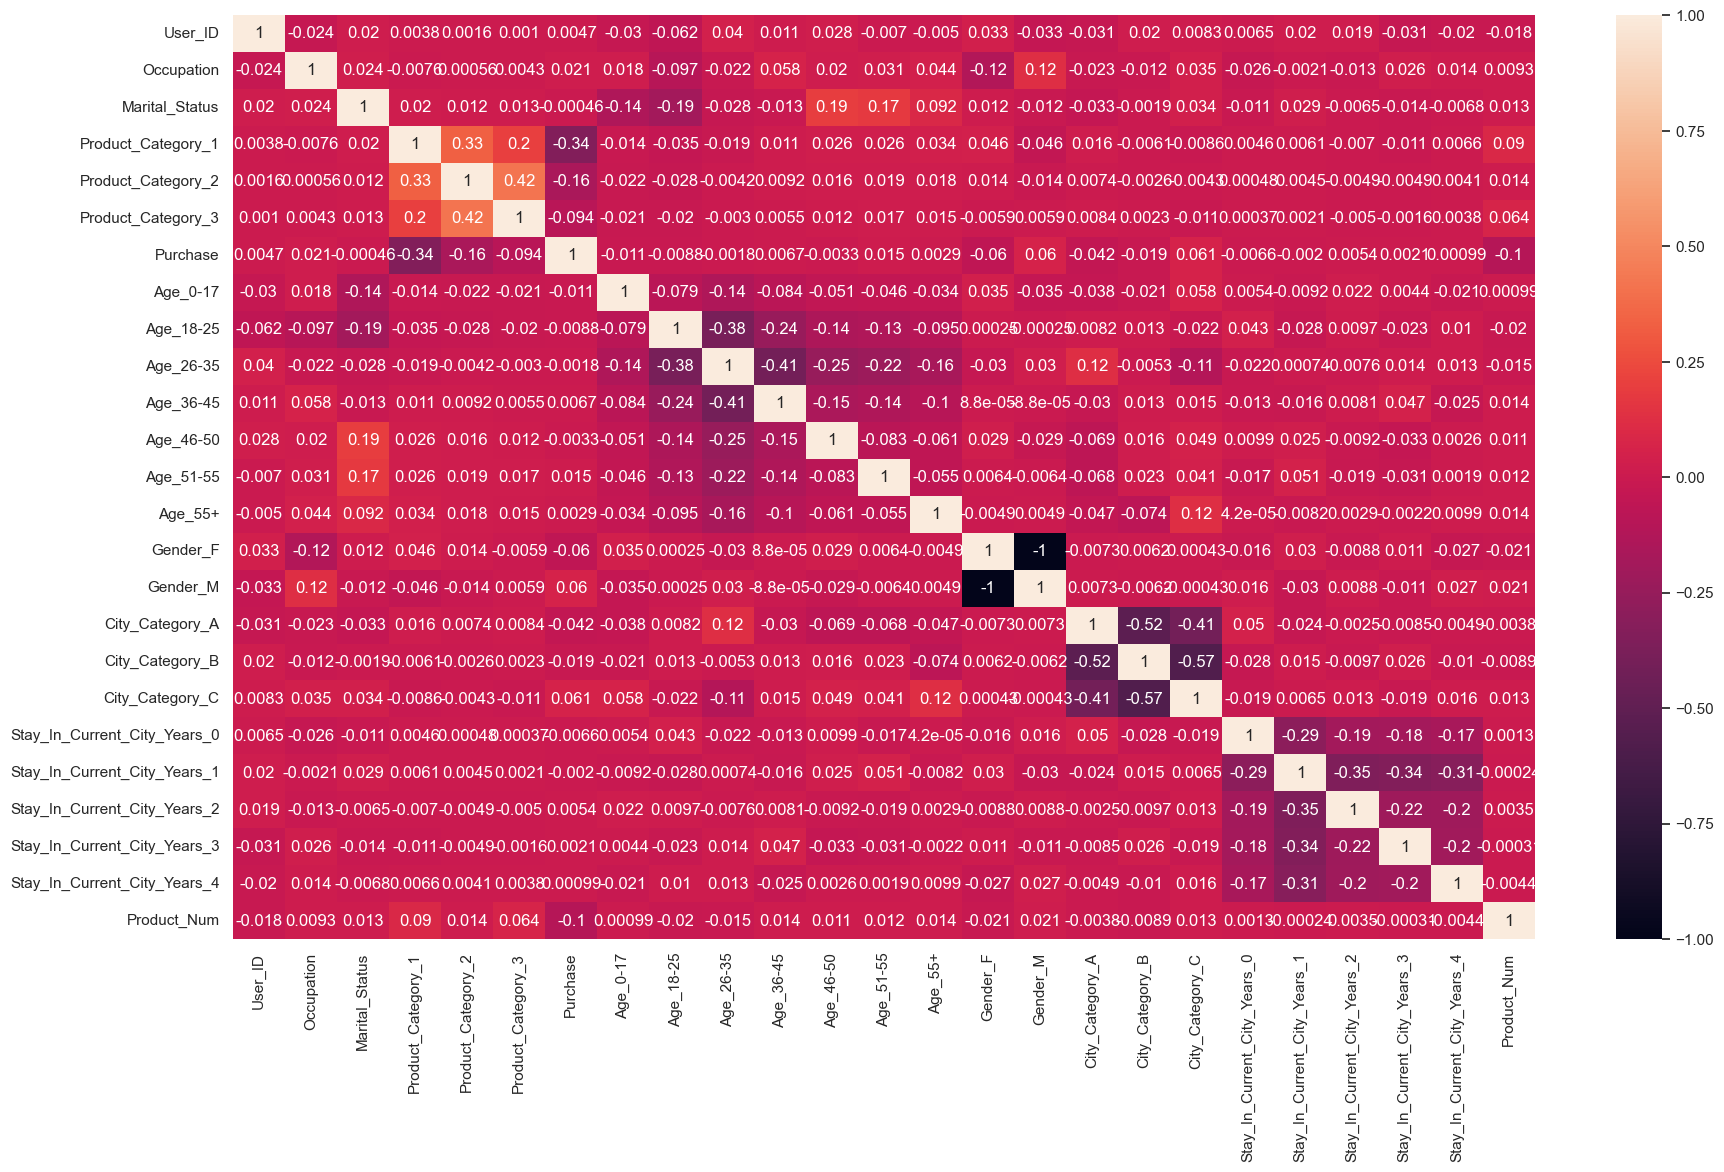

                               User_ID  Occupation  Marital_Status  \
User_ID                            NaN   -0.023971        0.020443   
Occupation                   -0.023971         NaN        0.024280   
Marital_Status                0.020443    0.024280             NaN   
Product_Category_1            0.003825   -0.007618        0.019888   
Product_Category_2            0.001644    0.000557        0.011526   
Product_Category_3            0.001008    0.004325        0.012705   
Purchase                      0.004716    0.020833       -0.000463   
Age_0-17                     -0.029809    0.017627       -0.139961   
Age_18-25                    -0.061903   -0.096659       -0.189174   
Age_26-35                     0.039550   -0.022461       -0.027654   
Age_36-45                     0.010785    0.058309       -0.013227   
Age_46-50                     0.028149    0.020323        0.191389   
Age_51-55                    -0.006963    0.030846        0.172278   
Age_55+             

In [79]:
plt.figure(figsize=(21, 12))
sns.heatmap(data=c2,annot =True)
plt.show()
threshold = 0.4
high_correlation = c2[((c1 < -threshold) | (c2 < threshold)) & (c2 != 1.0)]
result = high_correlation.dropna(axis=1, how='all')
print(result)

In [80]:
result

User_ID  Occupation  Marital_Status  \
User_ID                            NaN   -0.023971        0.020443   
Occupation                   -0.023971         NaN        0.024280   
Marital_Status                0.020443    0.024280             NaN   
Product_Category_1            0.003825   -0.007618        0.019888   
Product_Category_2            0.001644    0.000557        0.011526   
Product_Category_3            0.001008    0.004325        0.012705   
Purchase                      0.004716    0.020833       -0.000463   
Age_0-17                     -0.029809    0.017627       -0.139961   
Age_18-25                    -0.061903   -0.096659       -0.189174   
Age_26-35                     0.039550   -0.022461       -0.027654   
Age_36-45                     0.010785    0.058309       -0.013227   
Age_46-50                     0.028149    0.020323        0.191389   
Age_51-55                    -0.006963    0.030846        0.172278   
Age_55+                      -0.004961    0.044096        0.091778   
Gender_F                      0.033474   -0.117291        0.011603   
Gender_M                     -0.033474    0.117291       -0.011603   
City_Category_A              -0.030568   -0.023070       -0.033088   
City_Category_B               0.019688   -0.011673       -0.001863   
City_Category_C               0.008272    0.034529        0.033661   
Stay_In_Current_City_Years_0  0.006495   -0.026055       -0.010673   
Stay_In_Current_City_Years_1  0.019574   -0.002092        0.028831   
Stay_In_Current_City_Years_2  0.018551   -0.012716       -0.006474   
Stay_In_Current_City_Years_3 -0.030953    0.025974       -0.013635   
Stay_In_Current_City_Years_4 -0.019567    0.013905       -0.006782   
Product_Num                  -0.017619    0.009344        0.013194   

                              Product_Category_1  Product_Category_2  \
User_ID                                 0.003825            0.001644   
Occupation                             -0.007618            0.000557   
Marital_Status                          0.019888            0.011526   
Product_Category_1                           NaN            0.331691   
Product_Category_2                      0.331691                 NaN   
Product_Category_3                      0.195930                 NaN   
Purchase                               -0.343703           -0.156676   
Age_0-17                               -0.013681           -0.022067   
Age_18-25                              -0.035036           -0.027837   
Age_26-35                              -0.018637           -0.004163   
Age_36-45                               0.011429            0.009158   
Age_46-50                               0.025842            0.015802   
Age_51-55                               0.025784            0.018818   
Age_55+                                 0.033925            0.018270   
Gender_F                                0.045594            0.014051   
Gender_M                               -0.045594           -0.014051   
City_Category_A                         0.015702            0.007365   
City_Category_B                        -0.006076           -0.002618   
City_Category_C                        -0.008554           -0.004259   
Stay_In_Current_City_Years_0            0.004576            0.000476   
Stay_In_Current_City_Years_1            0.006121            0.004480   
Stay_In_Current_City_Years_2           -0.007000           -0.004893   
Stay_In_Current_City_Years_3           -0.010995           -0.004940   
Stay_In_Current_City_Years_4            0.006624            0.004064   
Product_Num                             0.090193            0.013537   

                              Product_Category_3  Purchase  Age_0-17  \
User_ID                                 0.001008  0.004716 -0.029809   
Occupation                              0.004325  0.020833  0.017627   
Marital_Status                          0.012705 -0.000463 -0.139961   
Product_Category_1                      0.195930 

----------------- -------------

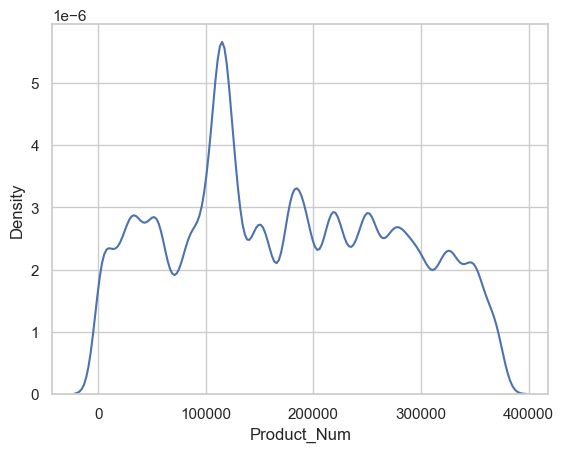

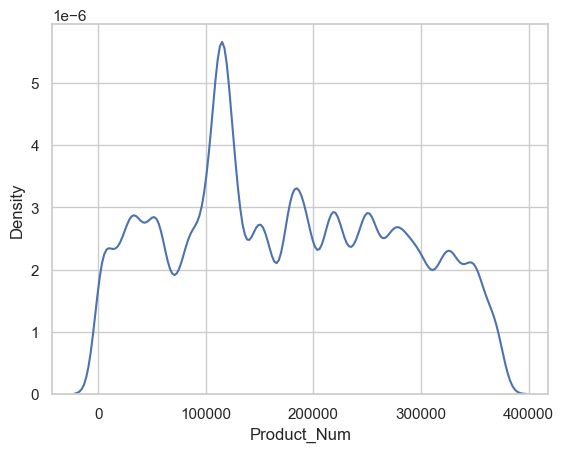

In [81]:
sns.kdeplot(data_mode.Product_Num)
plt.show()
sns.kdeplot(data_median.Product_Num)
plt.show()

<Axes: ylabel='Product_Num'>

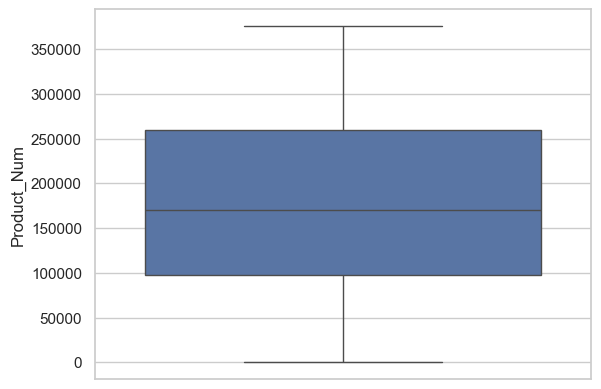

In [82]:
sns.boxplot(data_median.Product_Num)

In [83]:
from scipy import stats
data_mode['Product_Num_Transformed'],_= stats.boxcox(data_mode['Product_Num'])
data_median['Product_Num_Transformed'],_= stats.boxcox(data_median['Product_Num'])

In [84]:
data_median

User_ID  Occupation  Marital_Status  Product_Category_1  \
0       1000001          10               0                   3   
1       1000001          10               0                   1   
2       1000001          10               0                  12   
3       1000001          10               0                  12   
4       1000002          16               0                   8   
...         ...         ...             ...                 ...   
550063  1006033          13               1                  20   
550064  1006035           1               0                  20   
550065  1006036          15               1                  20   
550066  1006038           1               0                  20   
550067  1006039           0               1                  20   

        Product_Category_2  Product_Category_3  Purchase  Age_0-17  Age_18-25  \
0                      9.0                14.0      8370         1          0   
1                      6.0                14.0     15200         1          0   
2                      9.0                14.0      1422         1          0   
3                     14.0                14.0      1057         1          0   
4                      9.0                14.0      7969         0          0   
...                    ...                 ...       ...       ...        ...   
550063                 9.0                14.0       368         0          0   
550064                 9.0                14.0       371         0          0   
550065                 9.0                14.0       137         0          0   
550066                 9.0                14.0       365         0          0   
550067                 9.0                14.0       490         0          0   

        Age_26-35  ...  City_Category_A  City_Category_B  City_Category_C  \
0               0  ...                1                0                0   
1               0  ...                1                0                0   
2               0  ...                1                0                0   
3               0  ...                1                0                0   
4               0  ...                0                0                1   
...           ...  ...              ...              ...              ...   
550063          0  ...                0                1                0   
550064          1  ...                0                0                1   
550065          1  ...                0                1                0   
550066          0  ...                0                0                1   
550067          0  ...                0                1                0   

        Stay_In_Current_City_Years_0  Stay_In_Current_City_Years_1  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   
...                              ...                           ...   
550063                             0                             1   
550064                             0                             0   
550065                             0                             0   
550066                             0                             0   
550067                             0                             0   

        Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
0                                  1                             0   
1                                  1                             0   
2                                  1                             0   
3                                  1                             0   
4                                  0                             0   
...                              ...        

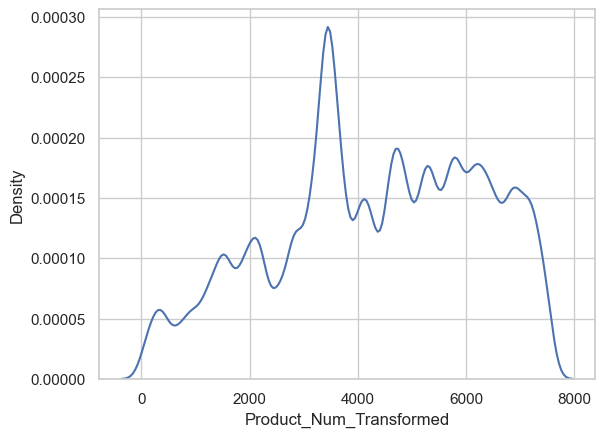

In [85]:
sns.kdeplot(data_median.Product_Num_Transformed)
plt.show()

In [86]:
data_mode.drop("Product_Num",axis=1,inplace=True)
data_median.drop("Product_Num",axis=1,inplace=True)

need tranformation and scal down some col to reduce complexity

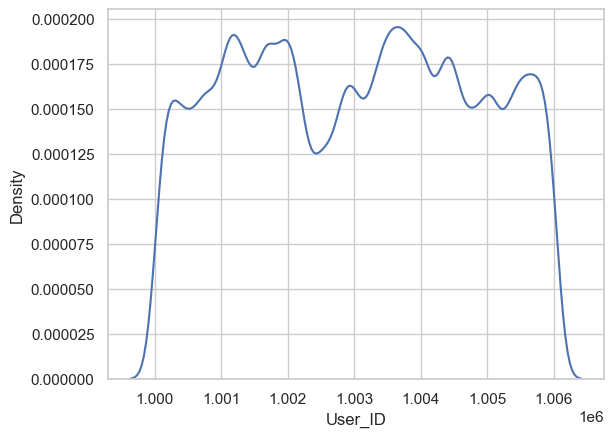

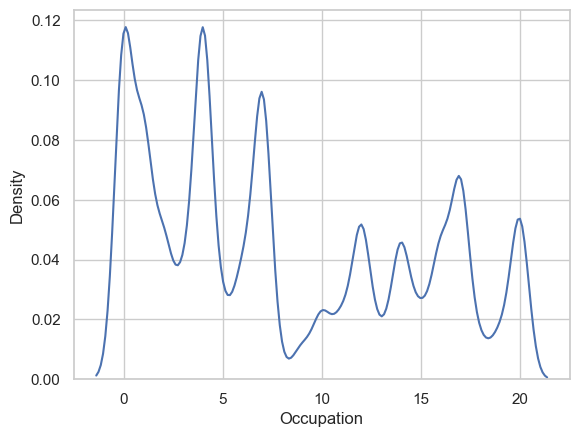

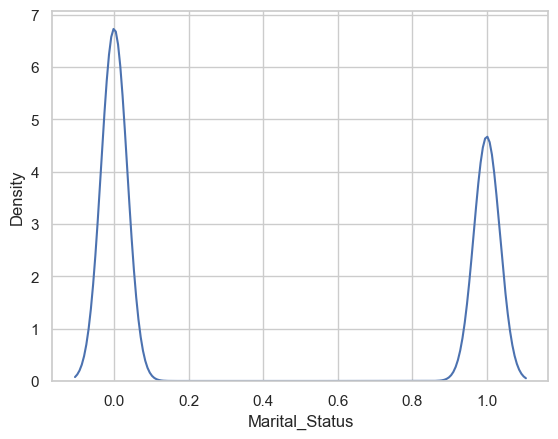

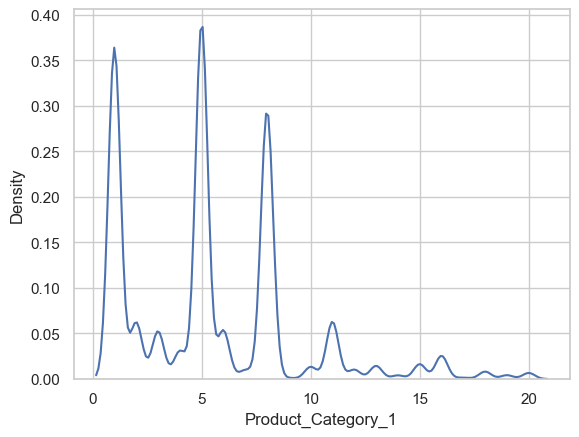

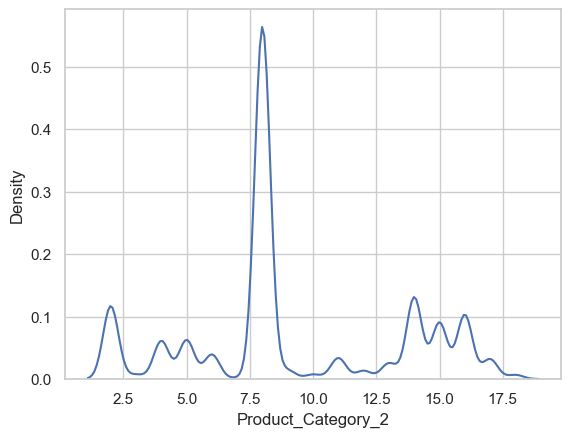

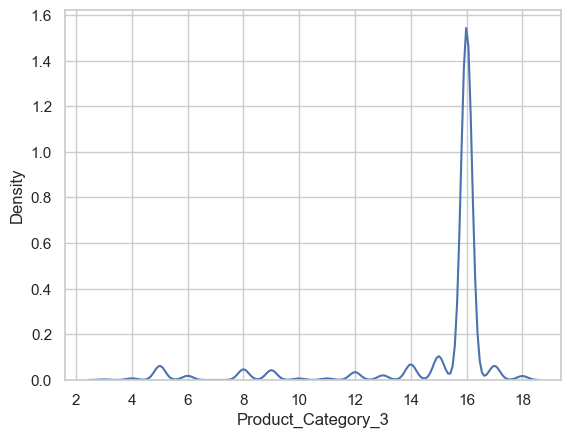

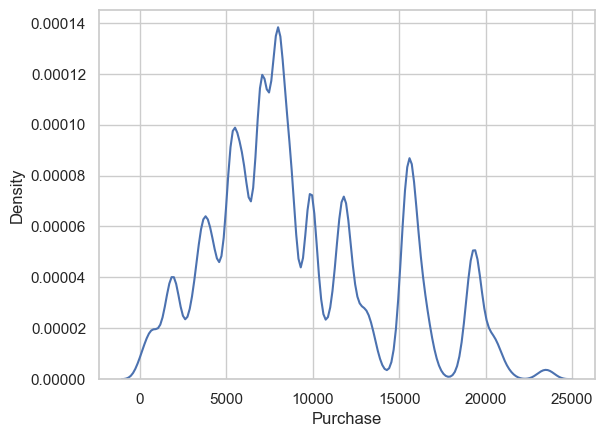

In [87]:
dat = data_mode.drop("User_ID",axis=1 )
num_col = data1.select_dtypes(['int', 'float']).columns
for col in num_col:
    sns.kdeplot(data_mode[col])
    plt.show()

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_mode = scaler.fit_transform(data_mode[['User_ID']])
scaled_data_median = scaler.fit_transform(data_median[['User_ID']])

In [89]:

data_mode[['User_ID']] = scaled_data_mode
data_median[['User_ID']] = scaled_data_median


In [90]:
data_mode

User_ID  Occupation  Marital_Status  Product_Category_1  \
0      -1.752639          10               0                   3   
1      -1.752639          10               0                   1   
2      -1.752639          10               0                  12   
3      -1.752639          10               0                  12   
4      -1.752061          16               0                   8   
...          ...         ...             ...                 ...   
550063  1.738930          13               1                  20   
550064  1.740087           1               0                  20   
550065  1.740666          15               1                  20   
550066  1.741824           1               0                  20   
550067  1.742403           0               1                  20   

        Product_Category_2  Product_Category_3  Purchase  Age_0-17  Age_18-25  \
0                      8.0                16.0      8370         1          0   
1                      6.0                14.0     15200         1          0   
2                      8.0                16.0      1422         1          0   
3                     14.0                16.0      1057         1          0   
4                      8.0                16.0      7969         0          0   
...                    ...                 ...       ...       ...        ...   
550063                 8.0                16.0       368         0          0   
550064                 8.0                16.0       371         0          0   
550065                 8.0                16.0       137         0          0   
550066                 8.0                16.0       365         0          0   
550067                 8.0                16.0       490         0          0   

        Age_26-35  ...  Gender_M  City_Category_A  City_Category_B  \
0               0  ...         0                1                0   
1               0  ...         0                1                0   
2               0  ...         0                1                0   
3               0  ...         0                1                0   
4               0  ...         1                0                0   
...           ...  ...       ...              ...              ...   
550063          0  ...         1                0                1   
550064          1  ...         0                0                0   
550065          1  ...         0                0                1   
550066          0  ...         0                0                0   
550067          0  ...         0                0                1   

        City_Category_C  Stay_In_Current_City_Years_0  \
0                     0                             0   
1                     0                             0   
2                     0                             0   
3                     0                             0   
4                     1                             0   
...                 ...                           ...   
550063                0                             0   
550064                1                             0   
550065                0                             0   
550066                1                             0   
550067                0                             0   

        Stay_In_Current_City_Years_1  Stay_In_Current_City_Years_2  \
0                                  0                             1   
1                                  0                             1   
2                                  0                             1   
3                                  0                             1   
4                                  0                             0   
...                              ...                           ...   
550063                             1                             0   
550064                             0                             0   
550065                             0                           

MODEL BUILDING REGRESSION 

I am considering all the columns loosing data will impact my model and their no multicolineraity in my data 
the corr is upto 51% and that can manegeble.

In [91]:
data_sample_mode = data_mode.sample(200000)
data_sample_median = data_median.sample(200000)

In [92]:
X_mode = data_sample_mode.drop("Purchase",axis=1)
y_mode = data_sample_mode["Purchase"]

X_median = data_sample_median.drop("Purchase",axis=1)
y_median = data_sample_median["Purchase"]

In [93]:
X_mode

User_ID  Occupation  Marital_Status  Product_Category_1  \
401541 -0.737352           4               0                   8   
1108   -1.644975           1               0                   8   
388459  1.591904           5               0                   8   
209819 -0.420726          12               1                   5   
441444 -0.648790          13               1                   1   
...          ...         ...             ...                 ...   
64396   0.485739          12               0                   8   
380225  0.835359          16               1                   1   
536023  0.849830           0               1                   8   
512898 -1.140804           1               0                   8   
462184  1.229550           7               0                   5   

        Product_Category_2  Product_Category_3  Age_0-17  Age_18-25  \
401541                12.0                16.0         0          1   
1108                   8.0                16.0         0          0   
388459                 8.0                16.0         0          0   
209819                 8.0                16.0         0          0   
441444                16.0                16.0         0          0   
...                    ...                 ...       ...        ...   
64396                 16.0                16.0         0          1   
380225                16.0                16.0         0          0   
536023                14.0                16.0         0          0   
512898                 8.0                16.0         0          0   
462184                15.0                16.0         0          0   

        Age_26-35  Age_36-45  ...  Gender_M  City_Category_A  City_Category_B  \
401541          0          0  ...         0                0                1   
1108            0          0  ...         0                0                1   
388459          1          0  ...         1                1                0   
209819          0          0  ...         1                1                0   
441444          0          0  ...         1                0                0   
...           ...        ...  ...       ...              ...              ...   
64396           0          0  ...         1                0                0   
380225          0          0  ...         0                0                1   
536023          0          0  ...         1                0                1   
512898          1          0  ...         1                0                1   
462184          1          0  ...         1                0                1   

        City_Category_C  Stay_In_Current_City_Years_0  \
401541                0                             0   
1108                  0                             0   
388459                0                             0   
209819                0                             0   
441444                1                             0   
...                 ...                           ...   
64396                 1                             1   
380225                0                             1   
536023                0                             0   
512898                0                             0   
462184                0                             0   

        Stay_In_Current_City_Years_1  Stay_In_Current_City_Years_2  \
401541                             0                             0   
1108                               1                             0   
388459                             1                             0   
209819                             1                             0   
441444                             0                             0   
...                              ...                           ...   
64396                              0                             0   
380225                             0                             0   
536023                             0               

In [94]:
y_mode

401541     2230
1108      10075
388459     5992
209819     3583
441444    15728
          ...  
64396      7853
380225    11818
536023     9745
512898     7939
462184     3473
Name: Purchase, Length: 200000, dtype: int64

Running algo with defalut parameter

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNeighborsRegressor' : KNeighborsRegressor(),
    #'SVR' :SVR()
}

X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.2, random_state=42)

for name, model in models.items():
    model.fit(X_train_mode, y_train_mode)
    predictions_mode = model.predict(X_test_mode)
    '''training_score = r2_score(X_train_mode, y_train_mode)
    testing_score = r2_score(X_test_mode, y_test_mode)'''
    rmse = np.sqrt(mean_squared_error(y_test_mode, predictions_mode))
    mae = mean_absolute_error(y_test_mode, predictions_mode)
    r2 = r2_score(y_test_mode, predictions_mode)
    
    print(f"Model: {name}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    
    #cv_scores = cross_val_score(model, X_mode, y_mode, cv=5)  
    #print(f"Cross-Validation Scores: {cv_scores}")
    
    


Model: Linear Regression
RMSE: 4643.899481109318
MAE: 3527.7188102714003
R2 Score: 0.137442372191796
Model: Lasso
RMSE: 4643.835619588155
MAE: 3527.4488560886284
R2 Score: 0.13746609529935883
Model: Ridge
RMSE: 4643.899417376118
MAE: 3527.718353645624
R2 Score: 0.13744239586739726


Model: Elastic Net
RMSE: 4651.818530019702
MAE: 3535.1554288733214
R2 Score: 0.13449809655860356
Model: Decision Tree
RMSE: 3786.1708501070048
MAE: 2653.12735
R2 Score: 0.42664591154929454
Model: Random Forest
RMSE: 2768.3992359137883
MAE: 2042.4865962499998
R2 Score: 0.6934650911258582
Model: KNeighborsRegressor
RMSE: 2943.9446331419003
MAE: 2158.042275
R2 Score: 0.6533575268176242


with mode random forest have better accurancy and less error 
with cv and haperparameter tuining

In [96]:

X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)

for name, model in models.items():
    model.fit(X_train_median, y_train_median)
    predictions_median = model.predict(X_test_median)
    #training_score = r2_score(X_train_median, y_train_median)
    #testing_score = r2_score(X_test_median, y_test_median)
    rmse = np.sqrt(mean_squared_error(y_test_median, predictions_median))
    mae = mean_absolute_error(y_test_median, predictions_median)
    r2 = r2_score(y_test_median, predictions_median)
    
    print(f"Model: {name}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    
    #cv_scores = cross_val_score(model, X_mode, y_mode, cv=5)  
    #print(f"Cross-Validation Scores: {cv_scores}")
    


Model: Linear Regression
RMSE: 4660.719440781091
MAE: 3575.3340301514745
R2 Score: 0.135311159614947
Model: Lasso
RMSE: 4660.708258879374
MAE: 3575.118455513759
R2 Score: 0.1353153086971448
Model: Ridge
RMSE: 4660.719383284675
MAE: 3575.3334456319026
R2 Score: 0.13531118094921057
Model: Elastic Net
RMSE: 4667.996581035863
MAE: 3581.966035504797
R2 Score: 0.13260884101327775
Model: Decision Tree
RMSE: 3824.5799669636926
MAE: 2681.8817
R2 Score: 0.41773400920168413
Model: Random Forest
RMSE: 2742.9504760263644
MAE: 2021.787468
R2 Score: 0.700504800500955
Model: KNeighborsRegressor
RMSE: 2928.363907065855
MAE: 2143.18014
R2 Score: 0.6586467646363137


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


rf_regressor = RandomForestRegressor(n_estimators=100)  

# Perform cross-validation
# 'cv' is the number of folds you want to use
cv_scores = cross_val_score(rf_regressor, X_median, y_median, cv=5, scoring='neg_mean_squared_error')
# 'scoring' parameter defines the metric you want to use for evaluation, here 'neg_mean_squared_error'

# Calculate mean of the scores
cv_mean_score = -cv_scores.mean()  # Multiply by -1 to get the positive MSE value

# Print the cross-validation mean score
print("Cross-Validation Mean MSE:", cv_mean_score)

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_regressor = RandomForestRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


# Perform GridSearchCV for hyperparameter tuning within cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit( X_median, y_median)

# Get the best parameters found 

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best score found during the grid search
best_score = -grid_search.best_score_
print("Best MSE Score:", best_score)


In [99]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

class DataPreprocessor:
    def __init__(self, data):
        self.data = data
    
    def preprocess_data(self):
        # Perform data preprocessing steps here
        # For example, handling missing values, encoding categorical variables, etc.
        # For demonstration purposes, let's drop missing values
        self.data.dropna(inplace=True)
        
        return self.data

class ModelBuilder:
    def __init__(self, features, target):
        self.features = features
        self.target = target
        self.model = RandomForestRegressor()  # Example model: RandomForestRegressor
    
    def split_data(self, data):
        X = data[self.features]
        y = data[self.target]
        return train_test_split(X, y, test_size=0.2, random_state=42)
    
    def train_model(self, X_train, X_test, y_train, y_test):
        self.model.fit(X_train, y_train)
        predictions = self.model.predict(X_test)
        return predictions
    
    def evaluate_model(self, y_true, predictions):
        mse = mean_squared_error(y_true, predictions)
        return mse

# Example usage:
# Assuming 'data' is your DataFrame and 'target_column' is the target variable column name
data = pd.read_csv('your_data.csv')

# Preprocessing
preprocessor = DataPreprocessor(data)
preprocessed_data = preprocessor.preprocess_data()

# Model building
features = ['feature1', 'feature2', 'feature3']  # Define your features
target_column = 'target'  # Define your target column
model_builder = ModelBuilder(features, target_column)

# Split data into train and test sets
X_train, X_test, y_train, y_test = model_builder.split_data(preprocessed_data)

# Train the model
predictions = model_builder.train_model(X_train, X_test, y_train, y_test)

# Evaluate the model
mse = model_builder.evaluate_model(y_test, predictions)
print(f"Mean Squared Error: {mse}")


FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'

import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrame to H2OFrame
h2o_df = h2o.H2OFrame(your_data)  # Replace your_data with your DataFrame

# Identify predictors and response
x = h2o_df.columns  # Input columns
y = "target_column"  # Target column name

# Run AutoML
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=h2o_df)

# View the leaderboard
lb = aml.leaderboard
print(lb.head())


In [ ]:
import pandas as pd

# Sample sales data
data = {
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics'],
    'Sales': [500, 300, 450, 200, 600],
    'Region': ['North', 'South', 'North', 'South', 'West']
}

df = pd.DataFrame(data)

# Grouping by 'Category' and calculating the total sales in each category
total_sales = df.groupby('Category')['Sales'].sum()
print(total_sales)


Category
Clothing        500
Electronics    1550
Name: Sales, dtype: int64


In [ ]:
import pandas as pd

# Sample sales data over time
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing'],
    'Sales': [500, 300, 450, 200]
}

df = pd.DataFrame(data)

# Creating a pivot table with 'Date' as index, 'Category' as columns, and 'Sales' as values
pivot_sales = df.pivot(index='Date', columns='Category', values='Sales')
print(pivot_sales)


Category    Clothing  Electronics
Date                             
2023-01-01       300          500
2023-01-02       200          450


In [ ]:
import pandas as pd

# Sample sales data with duplicates
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics'],
    'Sales': [500, 300, 250, 200, 450]
}

df = pd.DataFrame(data)

# Creating a pivot table with 'Date' as index, 'Category' as columns, and mean of 'Sales' as values
pivot_table_sales = df.pivot_table(index='Date', columns='Category', values='Sales', aggfunc='mean',9)
print(pivot_table_sales)


Category    Clothing  Electronics
Date                             
2023-01-01     300.0        375.0
2023-01-02     200.0        450.0
